<div align="center"><span style="color:midnightblue">

# **FINAL GROUP PROJECT - INSY 695 - Enterprise Data Science**
</span>
<br>

### Student 1:
### Student 2:

<br>

# **E-Commerce Customer Churn Analysis and Prediction**</div>
<br>

**USE CASE:** The aim of this project is to build a model to predict customer churn (i.e. predict which customers will cancel their subscriptions)

# FRAMING THE PROBLEM

[NEED TO EDIT THIS]
Customer churn is when customers stop doing business with an entity. In non-Subscription e-commerce business models, this occurs when a customer gradually reduces their purchase frequency over time, or may all of a sudden never buy again. In 2020, the average customer churn rate in the US within the online retail industry was 27%. In today's era of E-commerce, churn rate is an important indicator, and could signal something problematic with a company's business model or product. Companies are becoming increasingly more aware of the fact that retaining existing customers is the best marketing strategy to follow in order survive in the competitive e-commerce market. 

Our objective is to:
- Explore data and understand customer attributes that correlate to a higher risk of churn
- Build a model to predict customer churn

By using our solution and insights, a business can rank customers and focus its efforts on who is most likely to leave. Based on insights from the exploratory data analysis, they can identify product features to improve/optimize to prevent churn, as well as customer segments to target. This analysis could be the preliminary step a company takes when exploring strategic options, and will need further research to validate insights generated from our model. 

#This prediction task is a supervised classification one. Performance metrics used: Precision, Accuracy, AUC-ROC...


## DATA ACQUISITION

**IMPORT PACKAGES**

In [1]:
import pandas as pd
import numpy as np
#!pip install pandas_profiling
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

#!pip install pyjanitor

import janitor as jn
from sklearn import (
    metrics,
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)

#!pip install yellowbrick
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)

In [2]:
import warnings
import gc
warnings.simplefilter(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

**IMPORT DATA**

Source: Kaggle

Link: https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [112]:
url = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Churn-Analysis/main/data/E%20Commerce%20Dataset.csv"
df = pd.read_csv(url)

In [113]:
url2 = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Churn-Analysis/main/data/Data%20Dictionary.csv"
data_dict = pd.read_csv(url2)

In [114]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


**DATA DICTIONARY**

In [115]:
data_dict.head(10)
data_dict = data_dict.drop('Data', axis=1)
data_dict.style.set_properties(subset=['Discerption'], **{'width': '400px'})

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or website
9,NumberOfDeviceRegistered,Total number of deceives is registered on particular customer


In [116]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# 1 - EXPLORATORY DATA ANALYSIS

## Data Exploration

In [117]:
df.shape

(5630, 20)

### Check datatypes

In [118]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

Number of each type of column

Text(0, 0.5, 'Data type')

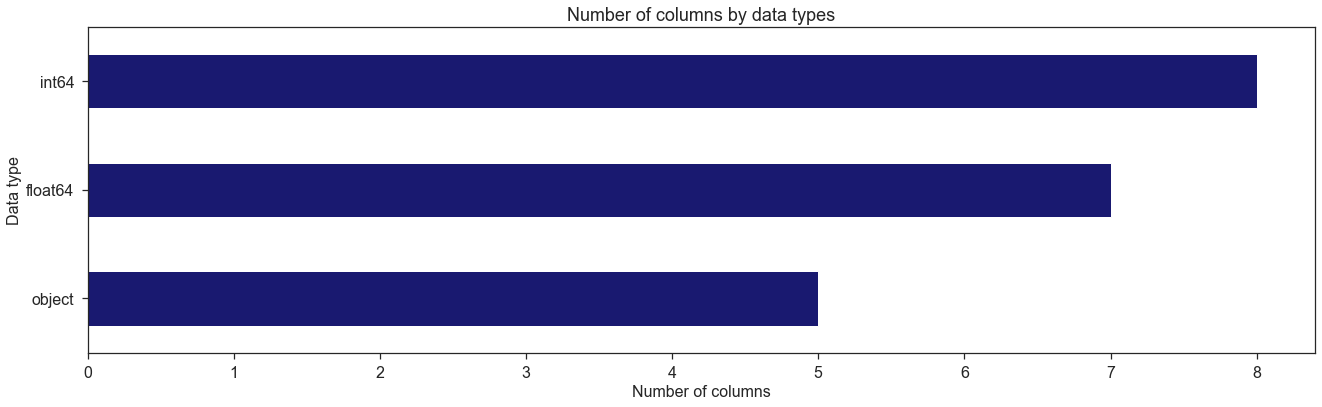

In [119]:
#FYI: COLOR NAMES: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(22, 6),
                                            fontsize=16,
                                           color="midnightblue")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

Numerical Data:

Categorical Data:

### Check the column names

In [120]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

### Summary Statistics

In [121]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


### Pandas Profiling

In [122]:
#Generate a HTML report
profile = df.profile_report(title='Pandas Profiling Report')
#profile

profile.to_file(output_file="profile_report_output.html")

AttributeError: 'DataFrame' object has no attribute 'profile_report'

Notes from pandas profiling report:

### Check for missing values

In [123]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
DaySinceLastOrder,307,5.5
OrderAmountHikeFromlastYear,265,4.7
Tenure,264,4.7
OrderCount,258,4.6
CouponUsed,256,4.5
HourSpendOnApp,255,4.5
WarehouseToHome,251,4.5


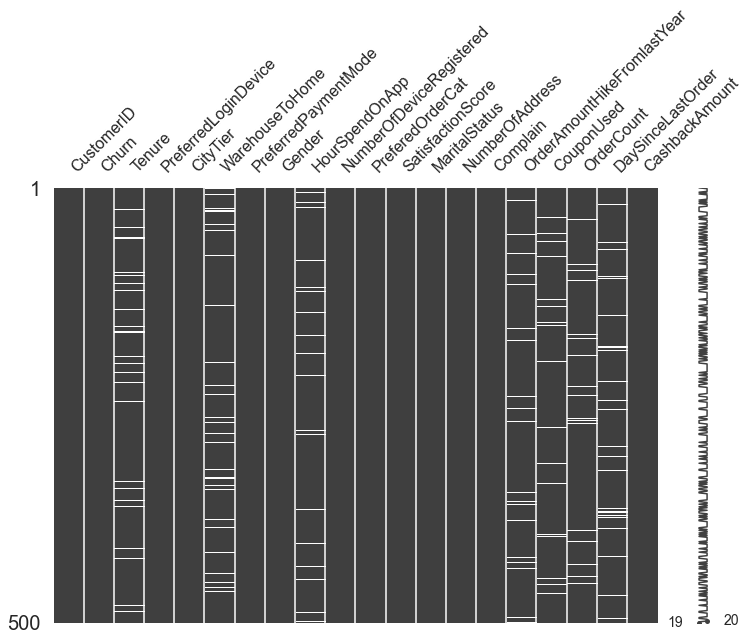

In [124]:
import missingno as msno
msno.matrix(df.sample(500), figsize=(12,8))
#msno.heatmap(df, figsize=(8, 8))

### Target Variable

In [125]:
df['Churn'].unique()

array([1, 0], dtype=int64)

### Check the distribution of 'Churn'

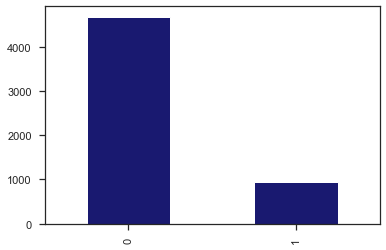

In [126]:
df['Churn'].value_counts().plot(kind='bar', color='midnightblue')

**NOTE: We see signs of imbalanced data**

### Correlations between predictors and target variable

Drop 'CustomerID'

In [127]:
df = df.drop(['CustomerID'], axis=1)

In [128]:
corr = df.corr()['Churn'].sort_values()

# Display correlations
print('8 Positive Correlations:')
print('-----------------------------------')
print(corr.tail(8))
print('\n7 Negative Correlations:')
print('------------------------------')
print(corr.head(7))

8 Positive Correlations:
-----------------------------------
HourSpendOnApp              0.018675
NumberOfAddress             0.043931
WarehouseToHome             0.076630
CityTier                    0.084703
SatisfactionScore           0.105481
NumberOfDeviceRegistered    0.107939
Complain                    0.250188
Churn                       1.000000
Name: Churn, dtype: float64

7 Negative Correlations:
------------------------------
Tenure                        -0.349408
DaySinceLastOrder             -0.160757
CashbackAmount                -0.154161
OrderCount                    -0.028697
OrderAmountHikeFromlastYear   -0.010058
CouponUsed                    -0.008264
HourSpendOnApp                 0.018675
Name: Churn, dtype: float64


We can see that no predictors are highly correlated with the target

**Explore the categorical variables**

Number of categories in each categorical variable

In [129]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [130]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [131]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [132]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [133]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [134]:
df['MaritalStatus'].value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

**Some duplicate categories that need to be combined**

In [135]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Mobile Phone': 'Phone'})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile': 'Mobile Phone'})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'Cash on Delivery':'COD'})

## Data Visualization

## Visualization of correlations between predictors and target variable

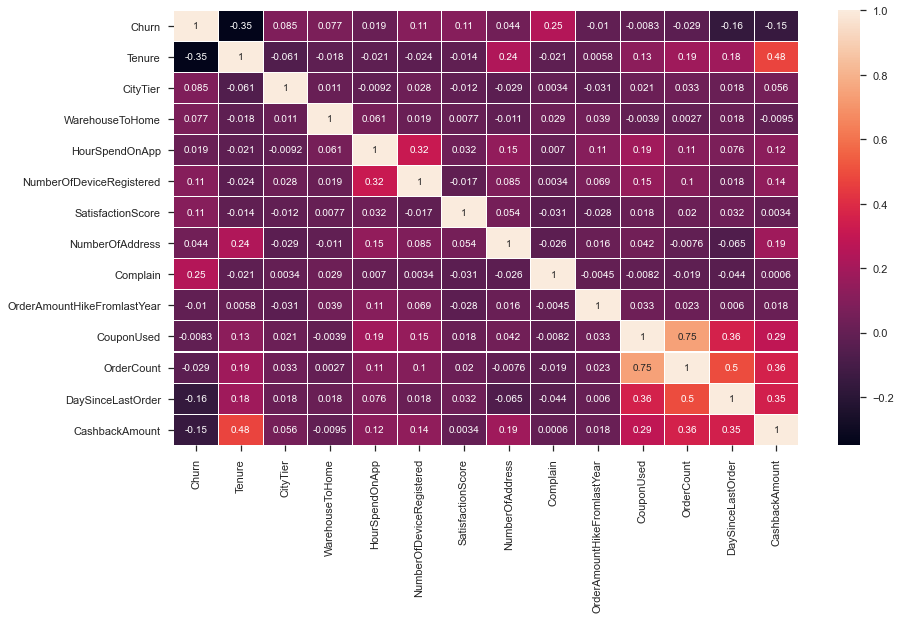

In [136]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot = True,  linewidths=.05) #could add  cmap="Purples" to change the colors 
plt.show()

### Pair plots across Churn

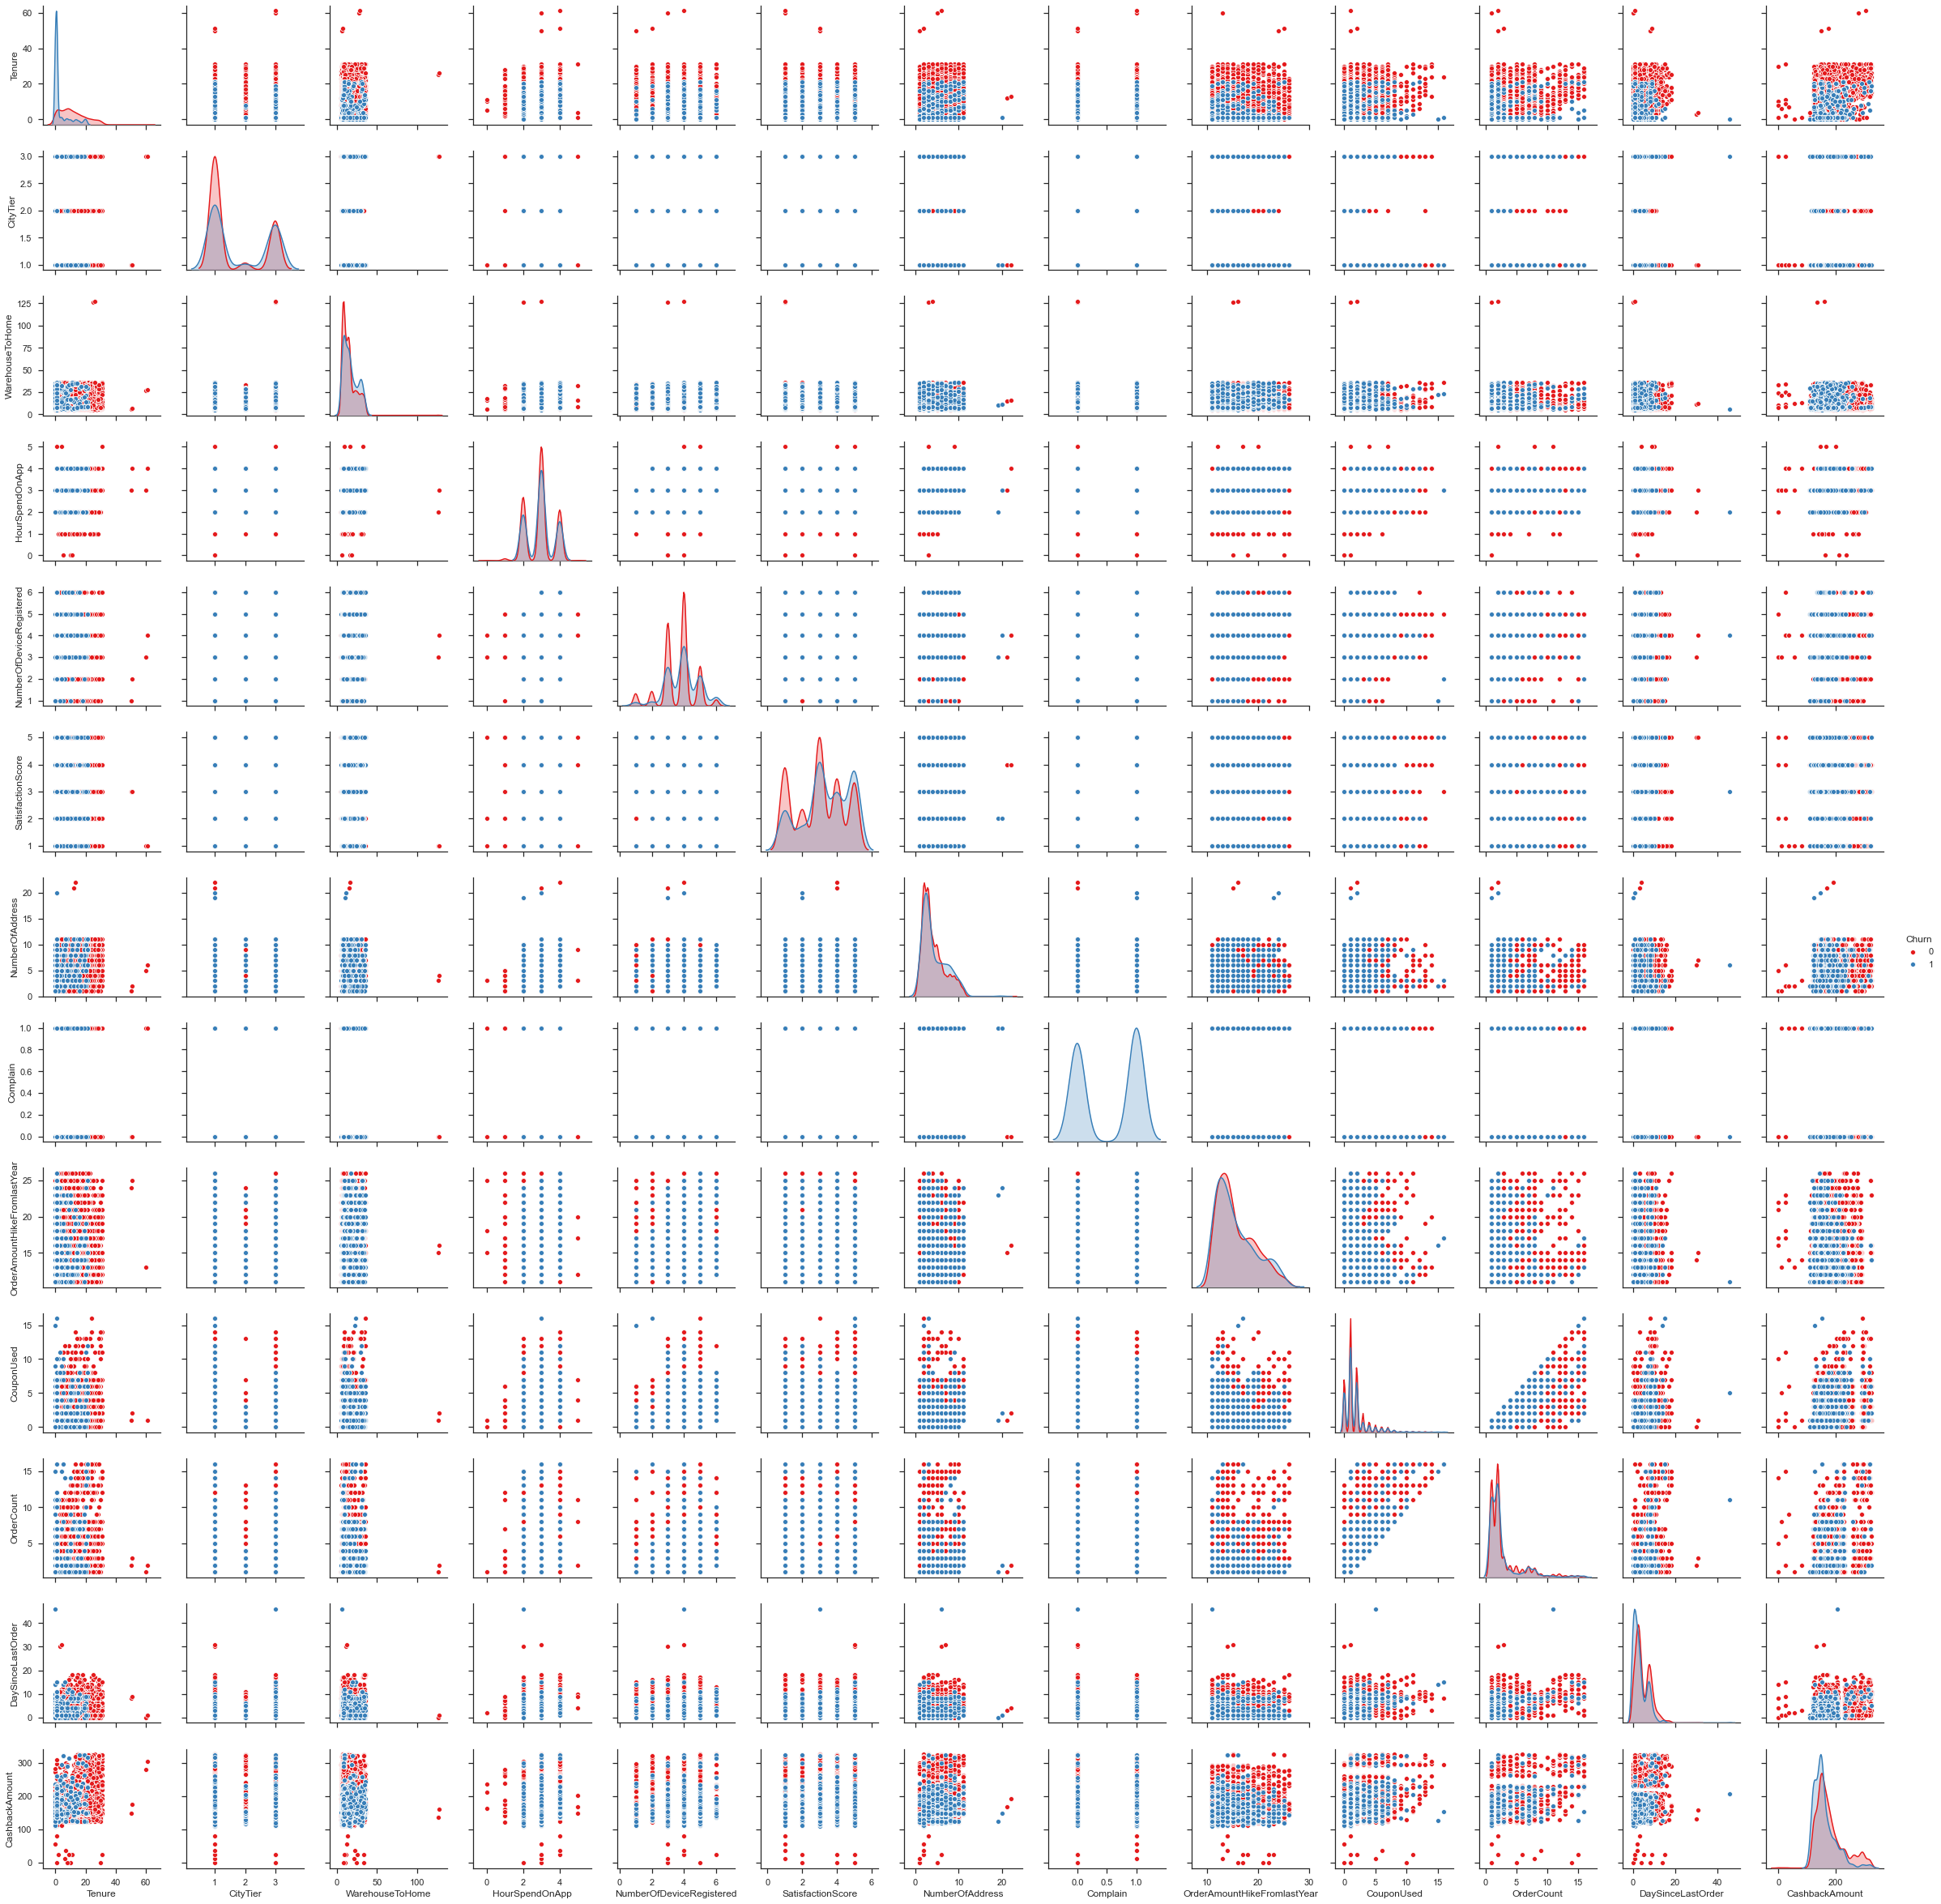

In [137]:
sns.set(style="ticks")

sns.pairplot(df, hue="Churn", palette="Set1")
plt.show()


###Specify which variables you want to see
#from seaborn import pairplot
#new_df = df.copy()
#vars = ["WarehouseToHome", "OrderAmountHikeFromlastYear", "DateSinceLastOrder"]
#p = pairplot(
#    new_df, vars=vars, hue="Churn", kind="reg"
#)

### Distribution of numerical variables

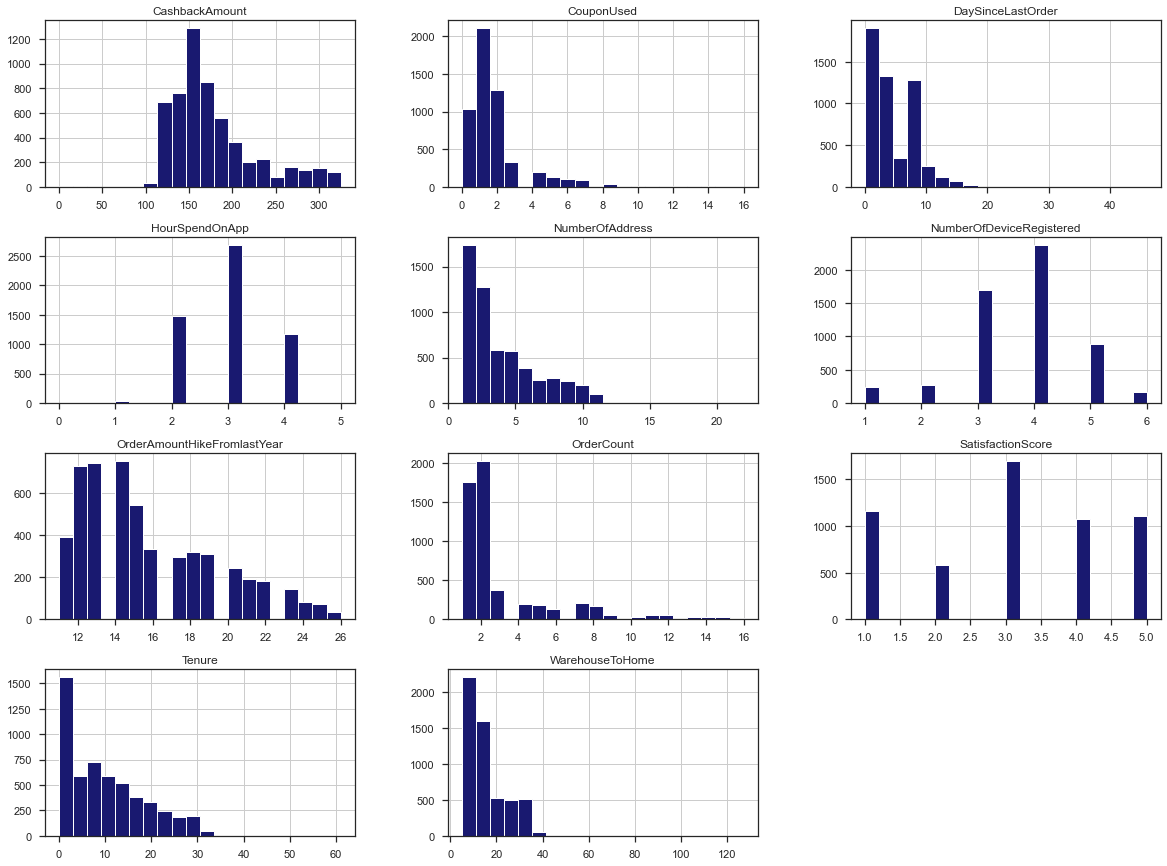

In [138]:
num_vars = df[['CashbackAmount','CouponUsed','DaySinceLastOrder','HourSpendOnApp','NumberOfAddress','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear','OrderCount','SatisfactionScore','Tenure','WarehouseToHome']]

num_vars.hist(bins=20, figsize=(20,15), color='midnightblue')
plt.show();

### Distribution of Categorical Variables

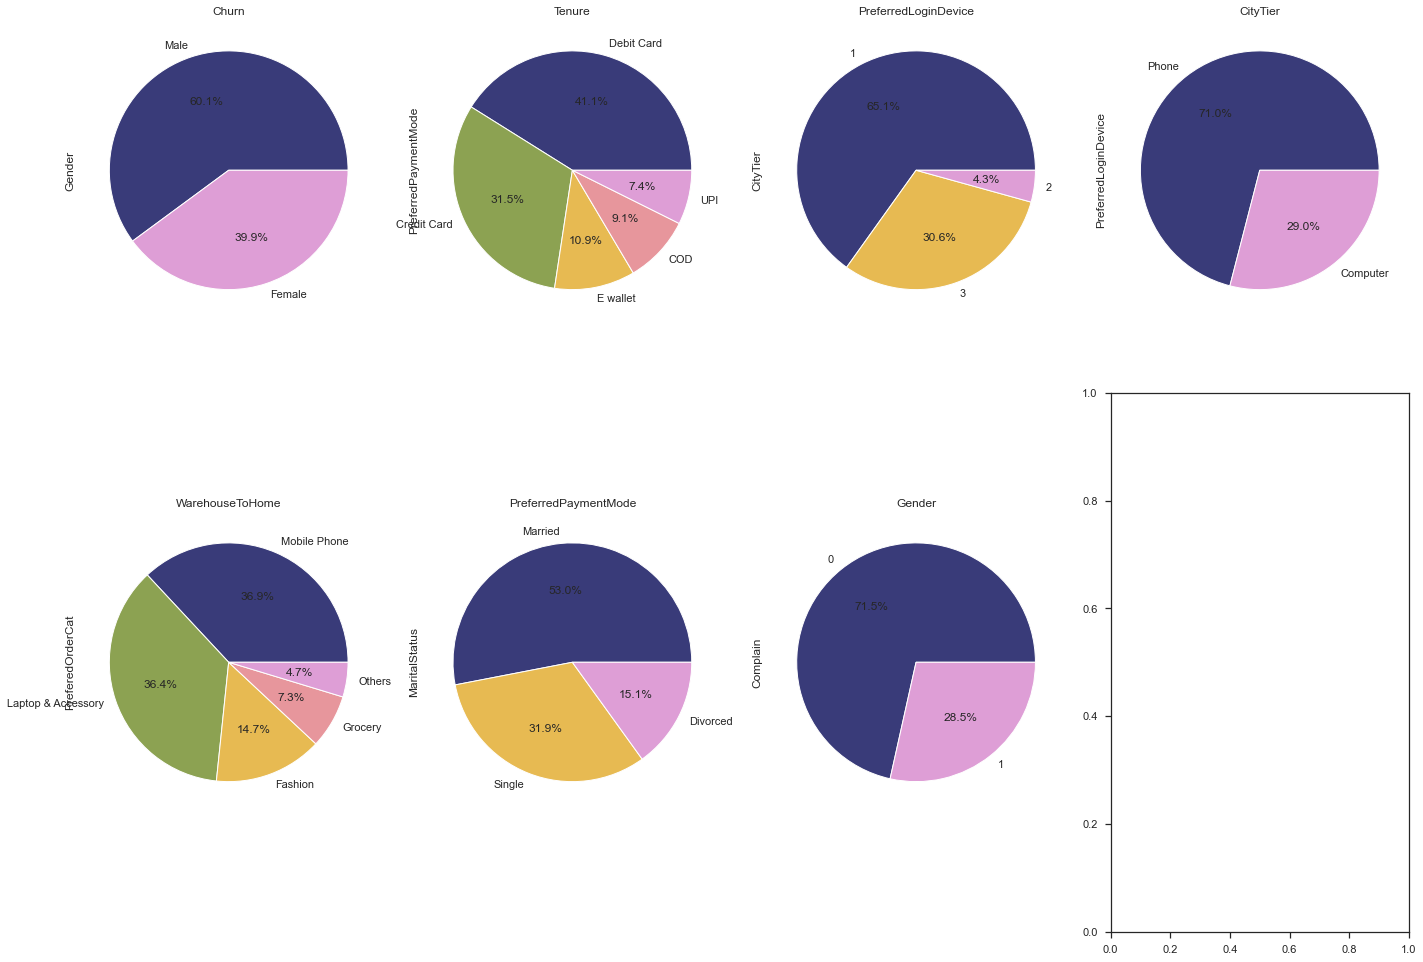

In [139]:
cat_vars = df[['Gender','PreferredPaymentMode','CityTier','PreferredLoginDevice','PreferedOrderCat','MaritalStatus','Complain']]
#cat_vars.columns

fig, axes = plt.subplots(round(len(cat_vars.columns) / 4), 4, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    if i < len(cat_vars.columns):
        df[cat_vars.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax, colormap='tab20b')
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_title(df.columns[i])

fig.tight_layout();

**Understanding characteristics of different Genders**

Gender is usually an important category, so let's explore it further

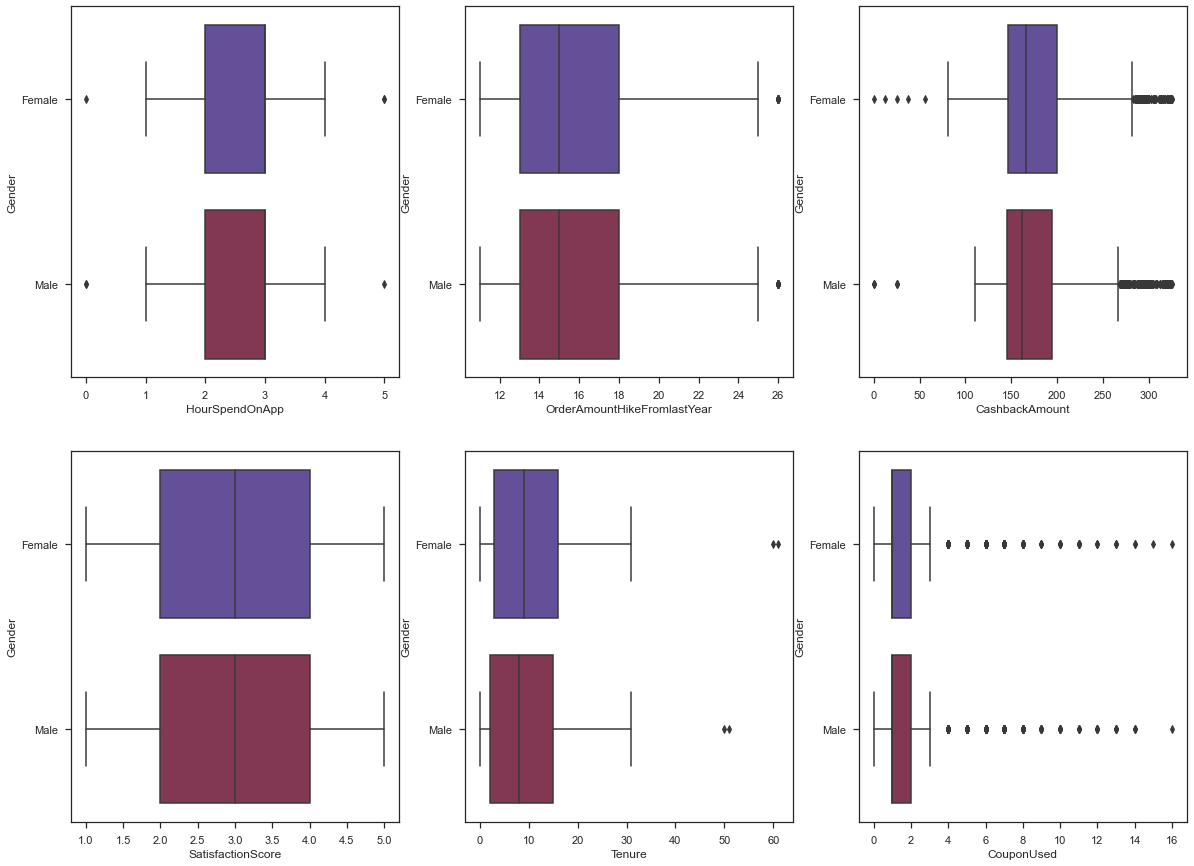

In [140]:
#gender vs hourssepndonapp

fig, axes = plt.subplots(2, 3, figsize=(20,15))
axes = axes.flatten()

ax = sns.boxplot(x='HourSpendOnApp',y='Gender',data=df,palette='twilight', ax=axes[0])
ax = sns.boxplot(x='OrderAmountHikeFromlastYear',y='Gender',data=df,palette='twilight', ax=axes[1])
ax = sns.boxplot(x='CashbackAmount',y='Gender',data=df,palette='twilight', ax=axes[2])
ax = sns.boxplot(x='SatisfactionScore',y='Gender',data=df,palette='twilight', ax=axes[3])
ax = sns.boxplot(x='Tenure',y='Gender',data=df,palette='twilight', ax=axes[4])
ax = sns.boxplot(x='CouponUsed',y='Gender',data=df,palette='twilight', ax=axes[5])


**INSIGHTS:**

**Coupon vs Ordercount per Marital Status**

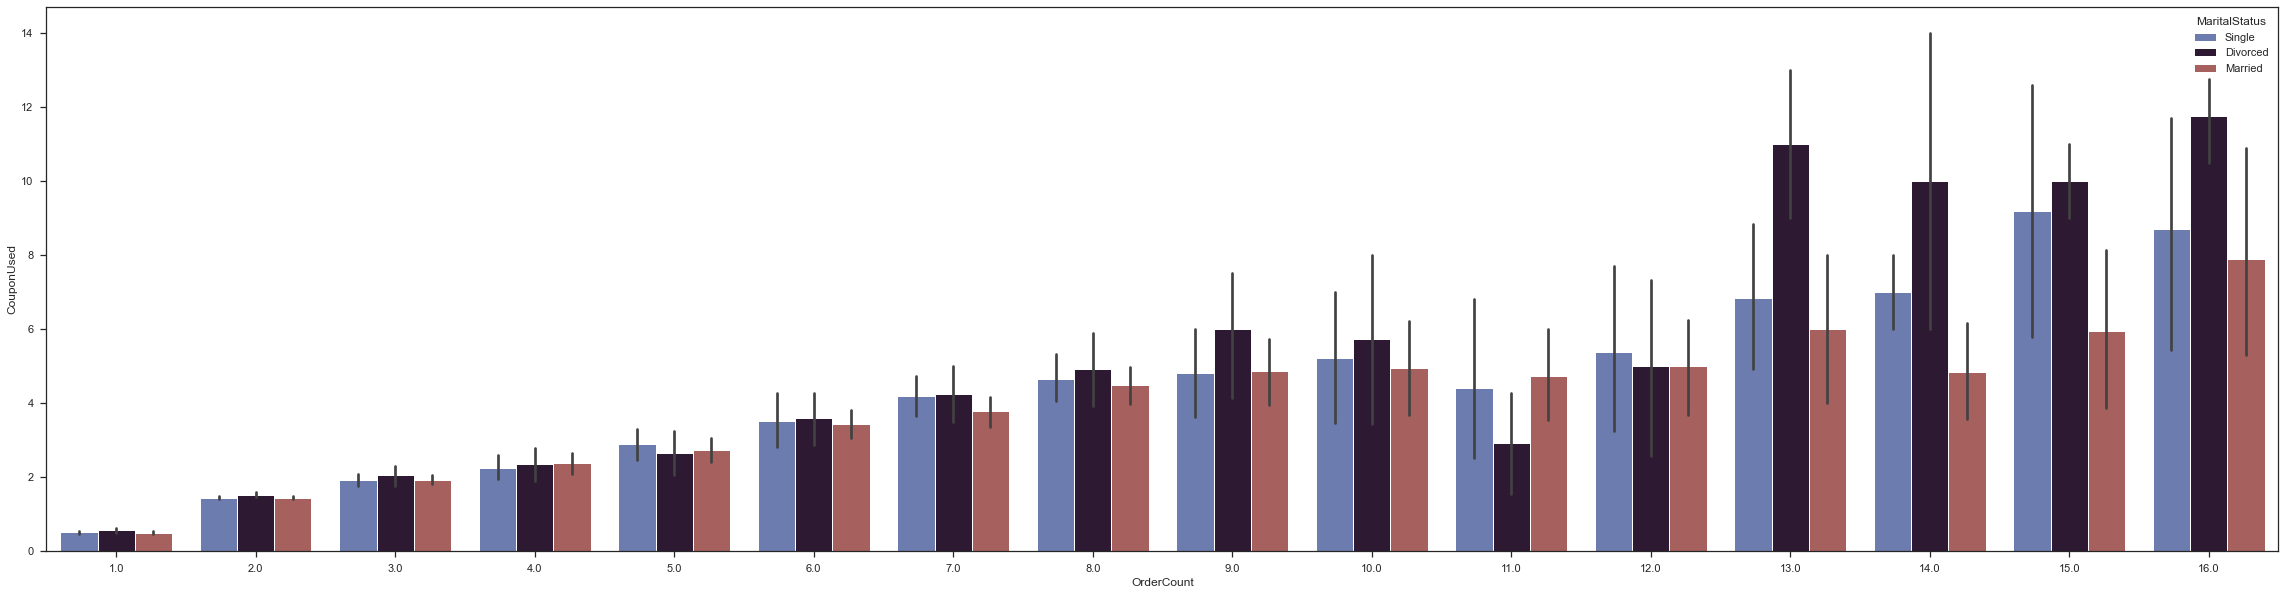

In [141]:
fig, axes = plt.subplots(figsize=(40,10))
sns.barplot(x="OrderCount", y="CouponUsed", data=df,hue='MaritalStatus',palette='twilight')

**INSIGHTS:**

### Initial Test of Hypotheses

Churn vs: satisfaction score, PreferredLoginDevice, CityTier, PreferredPaymentMode, Gender, PreferredOrderCat, MaritalStatus, Complain, Tenure, (I NEED TO REFINE THIS)

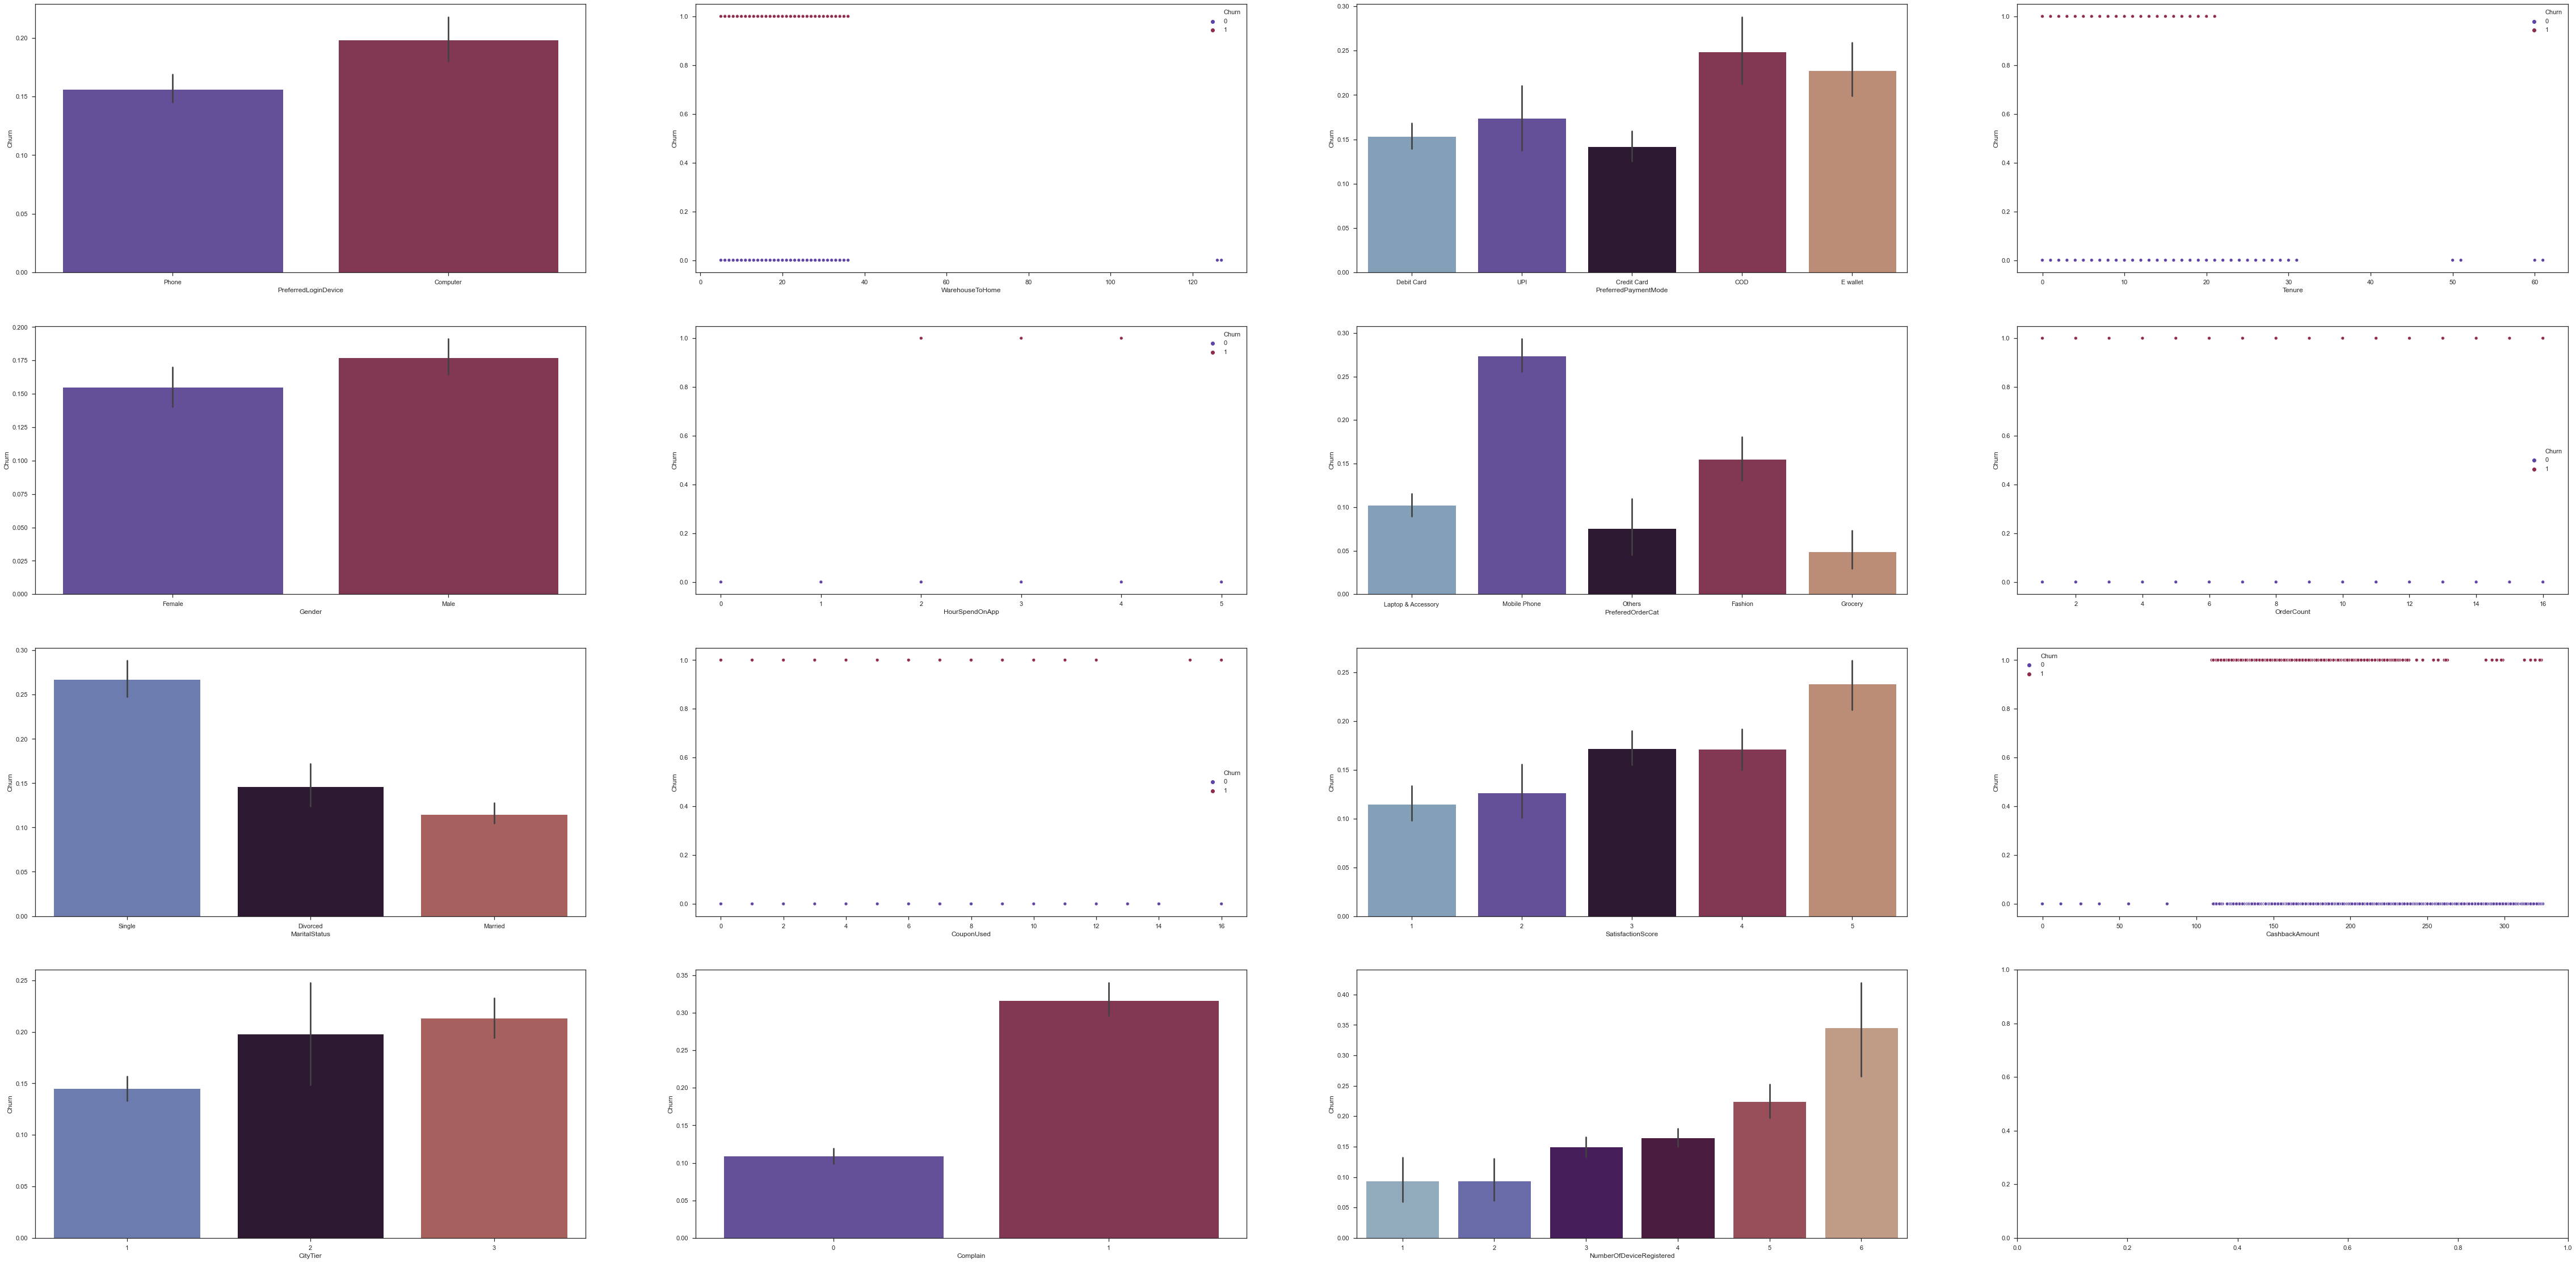

In [142]:
#FYI - Color palette names: https://python-graph-gallery.com/python-colors/

fig, axes = plt.subplots(4, 4, figsize=(80,40))
axes = axes.flatten()

ax = sns.barplot(x ='PreferredLoginDevice', y ='Churn', data = df, palette = 'twilight', orient='v', ax=axes[0])
ax = sns.scatterplot(x ='WarehouseToHome', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[1])
ax = sns.barplot(x ='PreferredPaymentMode', y ='Churn', data = df, palette = 'twilight', orient='v', ax=axes[2])
ax = sns.scatterplot(x ='Tenure', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[3])
ax = sns.barplot(x ='Gender', y ='Churn', data = df, palette = 'twilight', orient='v', ax=axes[4])
ax = sns.scatterplot(x ='HourSpendOnApp', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[5])
ax = sns.barplot(x ='PreferedOrderCat', y ='Churn', data = df, palette = 'twilight', orient='v', ax=axes[6])
ax = sns.scatterplot(x ='OrderCount', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[7])
ax = sns.barplot(x ='MaritalStatus', y ='Churn', data = df, palette = 'twilight', orient='v', ax=axes[8])
ax = sns.scatterplot(x ='CouponUsed', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[9])
ax = sns.barplot(x='SatisfactionScore', y='Churn', data=df, palette='twilight', orient='v', ax=axes[10])
ax = sns.scatterplot(x ='CashbackAmount', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[11])
ax = sns.barplot(x='CityTier', y='Churn', data=df, palette='twilight', orient='v', ax=axes[12])
ax = sns.barplot(x='Complain', y='Churn', data=df, palette='twilight', orient='v', ax=axes[13])
ax = sns.barplot(x='NumberOfDeviceRegistered', y='Churn', data=df, palette='twilight', orient='v', ax=axes[14])

**INSIGHTS:**

### Unsupervised Learning Analysis

Simulating new dataframe with some pre-processing for this analysis

In [44]:
df1 = df
df1 = pd.get_dummies(df1, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])
df1.columns
def clean_col(name):
    return (
        name.strip().replace(" ", "")
    )

df1 = df1.rename(columns=clean_col)
df1.head()

df1['DaySinceLastOrder'] = df1['DaySinceLastOrder'].fillna(df1['DaySinceLastOrder'].median())
df1['OrderAmountHikeFromlastYear'] = df1['OrderAmountHikeFromlastYear'].fillna(df1['OrderAmountHikeFromlastYear'].median())
df1['Tenure'] = df1['Tenure'].fillna(df1['Tenure'].median())
df1['OrderCount'] = df1['OrderCount'].fillna(df1['OrderCount'].median())
df1['CouponUsed'] = df1['CouponUsed'].fillna(df1['CouponUsed'].median())
df1['HourSpendOnApp'] = df1['HourSpendOnApp'].fillna(df1['HourSpendOnApp'].median())
df1['WarehouseToHome'] = df1['WarehouseToHome'].fillna(df1['WarehouseToHome'].median())

df1.keys()

Index(['Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'CityTier_1', 'CityTier_2', 'CityTier_3',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_CreditCard',
       'PreferredPaymentMode_DebitCard', 'PreferredPaymentMode_Ewallet',
       'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop&Accessory', 'PreferedOrderCat_MobilePhone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_0',
       'Complain_1'],
      dtype='object')

**PCA**

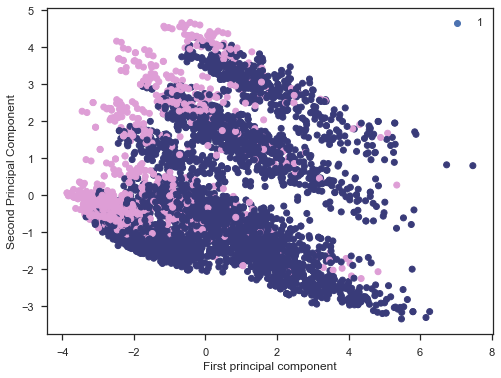

In [227]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_data = scaler.transform(df1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Churn'],cmap='tab20b')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
#plt.legend(df1['Churn'])

In [ ]:
pca.components_

**INSIGHTS:**

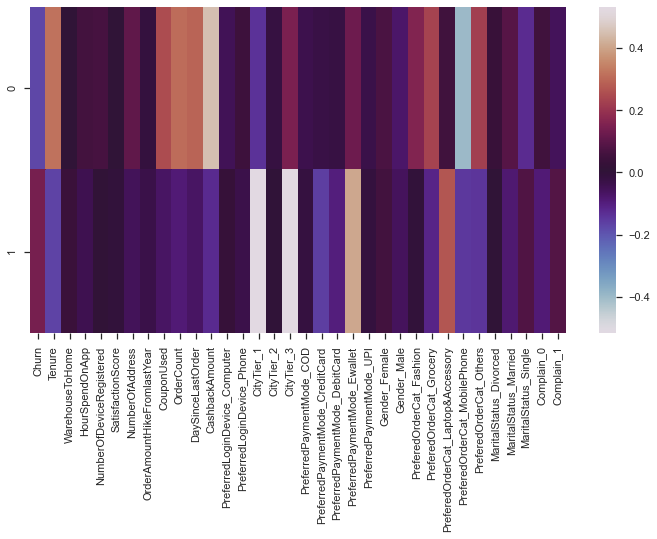

In [49]:
map= pd.DataFrame(pca.components_,columns=df1.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

Use: https://datascienceplus.com/principal-component-analysis-pca-with-python/ for analysis

**INSIGHTS:**

In [ ]:
#!pip install umap-learn

In [ ]:
#conda install -c conda-forge umap-learn

In [ ]:
#conda install -c conda-forge pynndescent

In [ ]:
#pip install pynndescent==0.5.2

In [ ]:
#pip freeze > requirements.txt

In [ ]:
#pip install umap-learn[plot]

In [ ]:
#pip install umap-learn[parametric_umap]

In [ ]:
#pip install umap-learn
X = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_MobilePhone', 'PreferredLoginDevice_Phone',
       'CityTier_1', 'CityTier_2', 'CityTier_3', 'PreferredPaymentMode_CC',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_CashonDelivery',
       'PreferredPaymentMode_CreditCard', 'PreferredPaymentMode_DebitCard',
       'PreferredPaymentMode_Ewallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop&Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_MobilePhone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_0',
       'Complain_1']
import umap
u = umap.UMAP(random_state=42)
X_umap = u.fit_transform()  
StandardScaler().fit_transform(X)
X_umap.shape

In [ ]:
#pip install -r requirements.txt

In [ ]:
#conda install scikit-learn numba

### PHATE

In [ ]:
import phate
p = phate.PHATE(random_state=42)
X_phate = p.fit_transform(X)
X_phate.shape
fig, ax = plt.subplots(figsize=(6, 4))
phate.plot.scatter2d(p, c=y, ax=ax, alpha=0.5)
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.reshape(4)
p = phate.PHATE(random_state=42, n_jobs=-1)
for i, n in enumerate((2, 5, 20, 100)):
    ax = axes[i]
    p.set_params(knn=n)
    X_phate = p.fit_transform(X)
    pd.DataFrame(X_phate).plot(
        kind="scatter",
        x=0,
        y=1,
        ax=ax,
c=y,
        cmap="Spectral", alpha=0.5,
    )   
ax.set_title(f"knn={n}")
plt.tight_layout()

### t-SNE

In [ ]:
X = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_MobilePhone', 'PreferredLoginDevice_Phone',
       'CityTier_1', 'CityTier_2', 'CityTier_3', 'PreferredPaymentMode_CC',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_CashonDelivery',
       'PreferredPaymentMode_CreditCard', 'PreferredPaymentMode_DebitCard',
       'PreferredPaymentMode_Ewallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop&Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_MobilePhone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_0',
       'Complain_1']
X = df1[X]
y = df1['Churn']
from sklearn.manifold import TSNE
X_std = StandardScaler().fit_transform(X)
ts = TSNE()
X_tsne = ts.fit_transform(X_std)
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y]
scat = ax.scatter(
X_tsne[:, 0], X_tsne[:, 1], c=colors,alpha=0.5,
)   
ax.set_xlabel("Embedding 1")
ax.set_ylabel("Embedding 2")
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.reshape(4)
for i, n in enumerate((2, 30, 50, 100)):
    ax = axes[i]
    t = TSNE(random_state=42, perplexity=n)
    X_tsne = t.fit_transform(X)
    pd.DataFrame(X_tsne).plot(
        kind="scatter",
        x=0,
        y=1,
        ax=ax,
c=y,
        cmap="Spectral",alpha=0.5,
    )   
    ax.set_title(f"perplexity={n}")
plt.tight_layout()

## Clustering

### KNN 

In [ ]:
from sklearn.cluster import KMeans 
k=4
kmeans = KMeans(n_clusters=k) 
y_pred = kmeans.fit_predict(X)
# KMeans instance preserves the labels of
# the instances it was trained on
y_pred is kmeans.labels_
kmeans.cluster_centers_
y_kmeans = kmeans.fit_predict(X)

kmeans.inertia_
kmeans.score(X)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
silhouette_visualizer(KMeans(5, random_state=42), X, colors='yellowbrick')

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

### DBSCAN

In [ ]:
X = StandardScaler().fit_transform(X)

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
len(dbscan.core_sample_indices_)
dbscan.core_sample_indices_
dbscan.components_
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Data Cleaning

**INFORMATION LEAKAGE**

We considered the possibility of *SatisfactionScore** leaking information into our model. However, after the exploratory analysis, we saw that there was no correlation between *SatisfactionScore* and *Churn*, so we have decided to keep it in the model.

# 2 - DATA PREPARATION

### TRAIN-TEST-VAL Split

We will split the data into Train, Test and Validation sets, so that when we pre-process, we only use the train set so that we do not leak information to the test and validation sets

train(70%) , test(30%) split

In [143]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

test(50%) val(50%) split

In [144]:
from sklearn.model_selection import train_test_split
test, val = train_test_split(test, test_size=0.5, random_state=42)

In [145]:
print(len(train))
print(len(test))
print(len(val))

3941
844
845


### Fill in Missing Values


In [146]:
train.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1559,1,0.0,Phone,1,NaN,COD,Female,2.0,3,Mobile Phone,5,Single,6,1,11.0,0.0,1.0,4.0,127
993,0,NaN,Phone,1,9.0,Debit Card,Female,2.0,3,Mobile Phone,1,Married,2,0,21.0,1.0,1.0,0.0,121
1187,1,0.0,Phone,2,24.0,UPI,Male,NaN,1,Mobile Phone,5,Married,1,0,17.0,1.0,1.0,0.0,130
188,0,6.0,Computer,1,11.0,Debit Card,Female,3.0,3,Fashion,4,Divorced,7,0,11.0,2.0,8.0,NaN,219
4630,0,1.0,Computer,3,31.0,Credit Card,Male,3.0,4,Mobile Phone,1,Married,2,0,14.0,2.0,3.0,2.0,149


**Simple Imputer**

In [16]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='median')

#imputer.fit(train[['DaySinceLastOrder','OrderAmountHikeFromlastYear','Tenure','OrderCount','CouponUsed','HourSpendOnApp',
#                  'WarehouseToHome']])

In [147]:
train['DaySinceLastOrder'] = train['DaySinceLastOrder'].fillna(train['DaySinceLastOrder'].median())
train['OrderAmountHikeFromlastYear'] = train['OrderAmountHikeFromlastYear'].fillna(train['OrderAmountHikeFromlastYear'].median())
train['Tenure'] = train['Tenure'].fillna(train['Tenure'].median())
train['OrderCount'] = train['OrderCount'].fillna(train['OrderCount'].median())
train['CouponUsed'] = train['CouponUsed'].fillna(train['CouponUsed'].median())
train['HourSpendOnApp'] = train['HourSpendOnApp'].fillna(train['HourSpendOnApp'].median())
train['WarehouseToHome'] = train['WarehouseToHome'].fillna(train['WarehouseToHome'].median())

val['DaySinceLastOrder'] = val['DaySinceLastOrder'].fillna(val['DaySinceLastOrder'].median())
val['OrderAmountHikeFromlastYear'] = val['OrderAmountHikeFromlastYear'].fillna(val['OrderAmountHikeFromlastYear'].median())
val['Tenure'] = val['Tenure'].fillna(val['Tenure'].median())
val['OrderCount'] = val['OrderCount'].fillna(val['OrderCount'].median())
val['CouponUsed'] = val['CouponUsed'].fillna(val['CouponUsed'].median())
val['HourSpendOnApp'] = val['HourSpendOnApp'].fillna(val['HourSpendOnApp'].median())
val['WarehouseToHome'] = val['WarehouseToHome'].fillna(val['WarehouseToHome'].median())


In [247]:
#test
test['DaySinceLastOrder'] = test['DaySinceLastOrder'].fillna(test['DaySinceLastOrder'].median())
test['OrderAmountHikeFromlastYear'] = test['OrderAmountHikeFromlastYear'].fillna(test['OrderAmountHikeFromlastYear'].median())
test['Tenure'] = test['Tenure'].fillna(test['Tenure'].median())
test['OrderCount'] = test['OrderCount'].fillna(test['OrderCount'].median())
test['CouponUsed'] = test['CouponUsed'].fillna(test['CouponUsed'].median())
test['HourSpendOnApp'] = test['HourSpendOnApp'].fillna(test['HourSpendOnApp'].median())
test['WarehouseToHome'] = test['WarehouseToHome'].fillna(test['WarehouseToHome'].median())

In [148]:
# Re-check for missing values
miss_values_train = missing_values(train)
miss_values_val = missing_values(val)

print(miss_values_train)
print(miss_values_val)


Dataframe has 19 columns.
There are 0 columns that have missing values.
Dataframe has 19 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [248]:
#test
miss_values_test = missing_values(test)
print(miss_values_test)

Dataframe has 19 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### Categorical Encoding

None of the categorial variables have an ordinal relationshpi, so we will use One-Hot Encoding.

In [149]:
train.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [150]:
train = pd.get_dummies(train, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])
val = pd.get_dummies(val, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])

In [249]:
#test
test = pd.get_dummies(test, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])

In [151]:
train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
1559,1,0.0,14.0,2.0,3,5,6,11.0,0.0,1.0,...,0,0,0,1,0,0,0,1,0,1
993,0,9.0,9.0,2.0,3,1,2,21.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,1,0,0,0,0,1,0,0,1,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,1,0,0,1,0,1,0


In [152]:
train.dtypes

Churn                                    int64
Tenure                                 float64
WarehouseToHome                        float64
HourSpendOnApp                         float64
NumberOfDeviceRegistered                 int64
SatisfactionScore                        int64
NumberOfAddress                          int64
OrderAmountHikeFromlastYear            float64
CouponUsed                             float64
OrderCount                             float64
DaySinceLastOrder                      float64
CashbackAmount                           int64
PreferredLoginDevice_Computer            uint8
PreferredLoginDevice_Phone               uint8
CityTier_1                               uint8
CityTier_2                               uint8
CityTier_3                               uint8
PreferredPaymentMode_COD                 uint8
PreferredPaymentMode_Credit Card         uint8
PreferredPaymentMode_Debit Card          uint8
PreferredPaymentMode_E wallet            uint8
PreferredPaym

**Clean column names**

In [153]:
def clean_col(name):
    return (
        name.strip().replace(" ", "")
    )

train = train.rename(columns=clean_col)
val = val.rename(columns=clean_col)

train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
1559,1,0.0,14.0,2.0,3,5,6,11.0,0.0,1.0,...,0,0,0,1,0,0,0,1,0,1
993,0,9.0,9.0,2.0,3,1,2,21.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,1,0,0,0,0,1,0,0,1,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,1,0,0,1,0,1,0


In [250]:
#test
def clean_col(name):
    return (
        name.strip().replace(" ", "")
    )

test = test.rename(columns=clean_col)


### Correlations

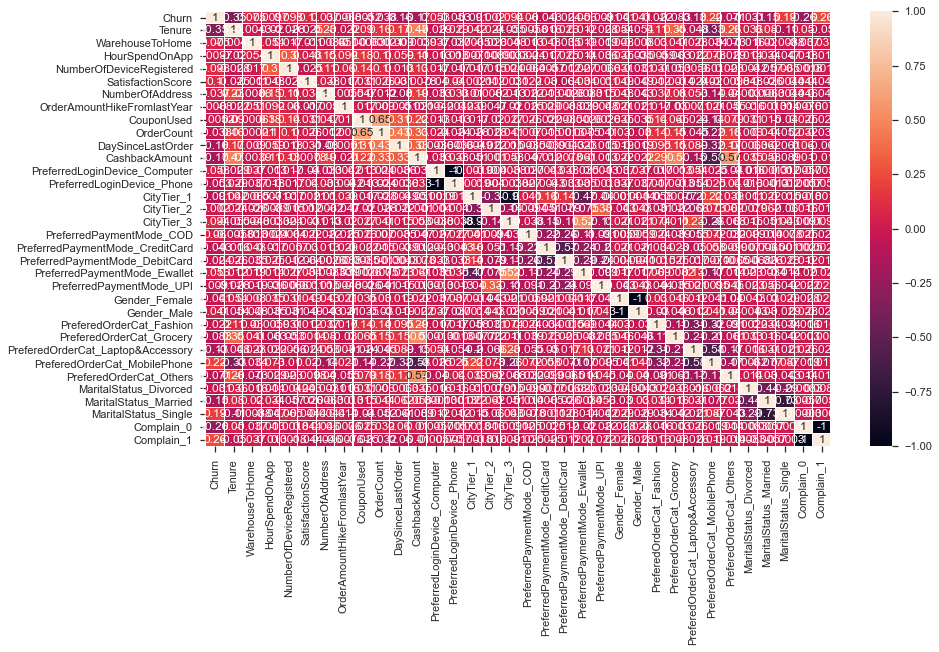

In [154]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(train.corr(),annot = True,  linewidths=.05) #could add  cmap="Purples" to change the colors 
plt.show()

**INSIGHTS:**
- Negative correlation between Gender_Female and Gender_Male (-1) 
- Negative correlation between Complain_0 and Complain_1 (-1) 
- Negative correlatio between CityTier_1 and CityTier_3 (0.9) 

In [155]:
corr_matrix = train.corr().abs()

mat = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
mat

Complain_0                     Complain_1                    1.000000
PreferredLoginDevice_Computer  PreferredLoginDevice_Phone    1.000000
Gender_Female                  Gender_Male                   1.000000
CityTier_1                     CityTier_3                    0.902594
MaritalStatus_Married          MaritalStatus_Single          0.731864
                                                               ...   
MaritalStatus_Single           Complain_0                    0.000296
                               Complain_1                    0.000296
WarehouseToHome                OrderCount                    0.000213
PreferredLoginDevice_Phone     MaritalStatus_Married         0.000133
PreferredLoginDevice_Computer  MaritalStatus_Married         0.000133
Length: 561, dtype: float64

**Remove Correlated Variables**

In [158]:
#drop complain_0, Gender_Male, and CityTier_3
train = train.drop(['Complain_0','Gender_Male','CityTier_3'], axis=1)
val = val.drop(['Complain_0','Gender_Male','CityTier_3'], axis=1)

In [159]:
train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Female,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_1
1559,1,0.0,14.0,2.0,3,5,6,11.0,0.0,1.0,...,1,0,0,0,1,0,0,0,1,1
993,0,9.0,9.0,2.0,3,1,2,21.0,1.0,1.0,...,1,0,0,0,1,0,0,1,0,0
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,1,1,0,0,0,0,1,0,0,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,0,1,0,0,1,0,0


In [251]:
#test
test = test.drop(['Complain_0','Gender_Male','CityTier_3'], axis=1)

### Outlier Treatment

Find outliers on the train set

Text(0, 0.5, 'Values')

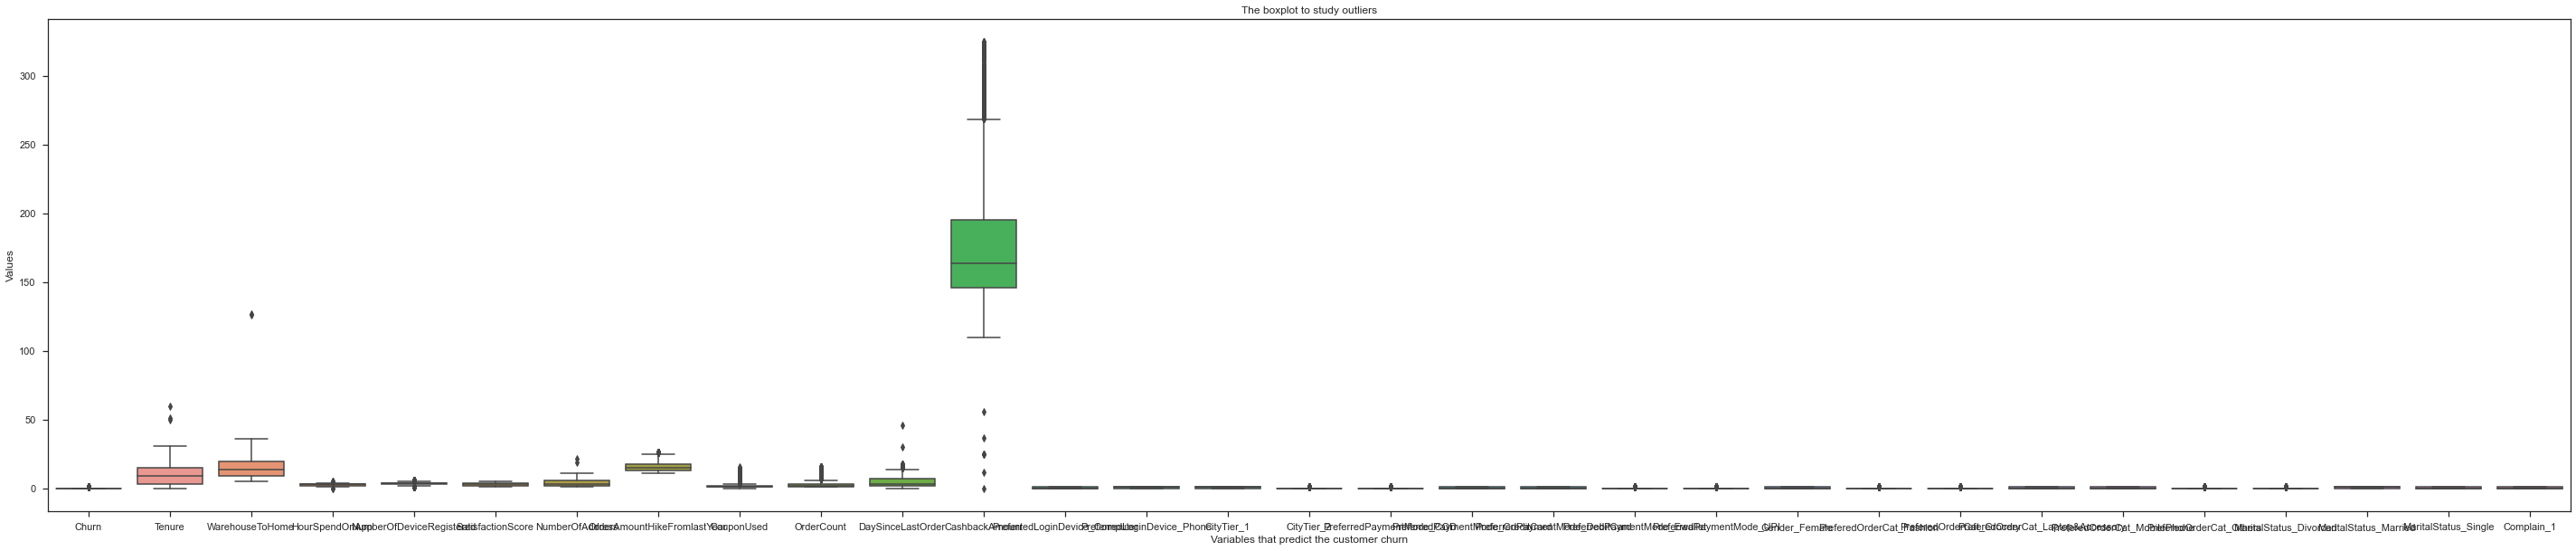

In [160]:
plt.figure(figsize=(50,10))
sns.boxplot(data=train)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

**INSIGHTS:** Quite a lot of outliers, espcially with 'CashbackAmount'

In [161]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(train)
score = iforest.decision_function(train)

from numpy import where
anom_index = where(pred== -1)
values = train.iloc[anom_index]
values

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Female,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_1
869,0,25.0,34.0,2.0,1,3,3,11.0,0.0,2.0,...,1,0,1,0,0,0,1,0,0,1
2263,0,24.0,15.0,2.0,3,4,5,15.0,6.0,11.0,...,0,0,0,0,0,1,0,1,0,1
1723,1,0.0,25.0,3.0,1,1,9,13.0,0.0,1.0,...,0,0,0,1,0,0,0,0,1,1
2908,0,19.0,13.0,3.0,5,2,8,13.0,13.0,13.0,...,1,1,0,0,0,0,0,0,1,0
4600,1,1.0,30.0,3.0,4,5,11,16.0,2.0,2.0,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,0,21.0,10.0,3.0,4,3,11,13.0,1.0,12.0,...,1,0,1,0,0,0,0,1,0,1
3991,0,31.0,9.0,3.0,4,4,6,23.0,11.0,15.0,...,0,0,1,0,0,0,0,1,0,0
146,1,10.0,35.0,2.0,3,4,2,12.0,5.0,9.0,...,0,1,0,0,0,0,1,0,0,1
4744,0,16.0,15.0,4.0,4,1,3,15.0,6.0,15.0,...,0,0,0,0,0,1,0,1,0,0


Out of 3941 observations, there are 79 outliers. **We will remove the outliers**

In [162]:
train = train[~train.index.isin(values.index)]
train.shape


(3862, 31)

### Separate Features and Targets

Separate in train, test and val sets

In [163]:
y_train = train['Churn']
X_train = train.drop(columns=['Churn'])

y_val = val['Churn']
X_val = val.drop(columns=['Churn'])


In [164]:
X_train.columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'CityTier_1', 'CityTier_2',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_CreditCard',
       'PreferredPaymentMode_DebitCard', 'PreferredPaymentMode_Ewallet',
       'PreferredPaymentMode_UPI', 'Gender_Female', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop&Accessory',
       'PreferedOrderCat_MobilePhone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Complain_1'],
      dtype='object')

In [252]:
#test
y_test = test['Churn']
X_test = test.drop(columns=['Churn'])

### Feature Selection

RFE

In [102]:

#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

#lr=LogisticRegression(max_iter=5000)
#rfe=RFE(lr,n_features_to_select=20)
#model=rfe.fit(X_train,y_train)
#model.support_
#model.ranking_

#pd.DataFrame(list(zip(X_train.columns,model.ranking_)), columns = ['predictor','ranking']).sort_values("ranking")

LASSO

In [103]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_std = scaler.fit_transform(X_train)

#from sklearn.linear_model import Lasso
#model = Lasso(alpha=0.01)
#model.fit(X_std,y_train)
#model.coef_

#pd.DataFrame(list(zip(X_train.columns,model.coef_)), columns = ['predictor','coefficient']).sort_values("coefficient")

Random Forest

In [104]:
#from sklearn.ensemble import RandomForestClassifier
#randomforest = RandomForestClassifier(random_state=0)

#model = randomforest.fit(X_train,y_train)

#model.feature_importances_

#pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")

Compare RFE and LASSO and see which variables overlap - remove them



### Baseline Model Classifier

In [165]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

Accuracy

In [166]:
dummy_clf.score(X_val, y_val)

0.7585798816568048

Precision

In [167]:
print(metrics.confusion_matrix(y_val, dummy_clf.predict(X_val)))

[[612 103]
 [105  25]]


In [108]:
#import matplotlib.pyplot as plt  
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(dummy_clf, X_val, y_val)  
#plt.show()  

In [109]:
#print(metrics.classification_report(dummy_clf.predict(X_val), y_val, digits=3))

### Standardize the Data

In [168]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)


In [255]:
#test
X_test = sc.fit_transform(X_test)

### Evaluation Metrics

ROC Curves

In [169]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

PR Curve

In [170]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

Classification Score

In [171]:
def clf_score(clf, X_train, y_train, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

In [172]:
def clf_score_2(clf, X_test, y_test, train=False):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

Classification Metrics

In [173]:
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

### Dealing with Imbalanced Data

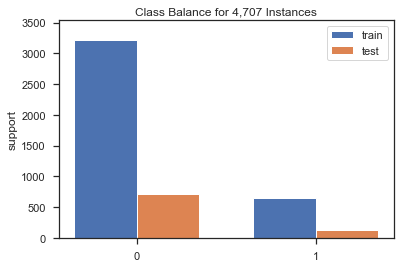

In [175]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=[0, 1])

visualizer.fit(y_train, y_val)        # Fit the data to the visualizer
visualizer.show()  

The resulting figure allows us to diagnose the severity of the balance issue. In this figure we can see that the "0" class dominates the "1" class. 

Oversampling

In [176]:
print('Before OverSampling, the shape of X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, the shape of X: (3862, 30)
Before OverSampling, the shape of y: (3862,) 

Before OverSampling, counts of label '1': 648
Before OverSampling, counts of label '0': 3214


In [177]:
#!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
#X_val_ros, y_val_ros = ros.fit_sample(X_val, y_val)
pd.Series(y_train_ros).value_counts()
#pd.Series(y_val_ros).value_counts()

1    3214
0    3214
Name: Churn, dtype: int64

In [178]:
print('After OverSampling, the shape of X: {}'.format(X_train_ros.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_train_ros.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_ros == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ros == 0)))

After OverSampling, the shape of X: (6428, 30)
After OverSampling, the shape of y: (6428,) 

After OverSampling, counts of label '1': 3214
After OverSampling, counts of label '0': 3214


In [179]:
X_train_ros

array([[-1.20615182, -0.18287575, -1.33602064, ..., -1.07589121,
         1.46281831,  1.59471605],
       [-0.12114897, -0.77707578, -1.33602064, ...,  0.929462  ,
        -0.6836119 , -0.62707088],
       [-1.20615182,  1.00552431,  0.08852704, ...,  0.929462  ,
        -0.6836119 , -0.62707088],
       ...,
       [-1.08559595,  0.17364427,  1.51307473, ..., -1.07589121,
         1.46281831,  1.59471605],
       [-1.20615182,  0.64900429, -1.33602064, ...,  0.929462  ,
        -0.6836119 ,  1.59471605],
       [-1.08559595, -0.06403575,  1.51307473, ...,  0.929462  ,
        -0.6836119 ,  1.59471605]])

ANOTHER METHOD: SMOTE

In [197]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
pd.Series(y_train_sm).value_counts()

1    3214
0    3214
Name: Churn, dtype: int64

Turning array into a dataframe

In [181]:
train_X = train.drop(['Churn'], axis=1)
cols = list(train_X)

X_train_ros=pd.DataFrame(X_train_ros)
X_train_ros.columns=cols
#Renaming column name of Target variable
y_train_ros=pd.DataFrame(y_train_ros)
y_train_ros.columns = ['Churn_1']
scaled_train_df = pd.concat([X_train_ros,y_train_ros], axis=1)
scaled_train_df

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_1,Churn_1
0,-1.206152,-0.182876,-1.336021,-0.675238,1.407797,0.719369,-1.303092,-0.956922,-0.691200,-0.107139,...,-0.411818,-0.269221,-0.766807,1.281244,-0.200323,-0.411818,-1.075891,1.462818,1.594716,1
1,-0.121149,-0.777076,-1.336021,-0.675238,-1.501198,-0.849572,1.470575,-0.390020,-0.691200,-1.236121,...,-0.411818,-0.269221,-0.766807,1.281244,-0.200323,-0.411818,0.929462,-0.683612,-0.627071,0
2,-1.206152,1.005524,0.088527,-2.640399,1.407797,-1.241808,0.361108,-0.390020,-0.691200,-1.236121,...,-0.411818,-0.269221,-0.766807,1.281244,-0.200323,-0.411818,0.929462,-0.683612,-0.627071,1
3,-0.482817,-0.539396,0.088527,-0.675238,0.680548,1.111604,-1.303092,0.176882,1.882616,-0.389385,...,2.428256,-0.269221,-0.766807,-0.780491,-0.200323,2.428256,-1.075891,-0.683612,-0.627071,0
4,-1.085596,1.837404,0.088527,0.307343,-1.501198,-0.849572,-0.470992,0.176882,0.044176,-0.671630,...,-0.411818,-0.269221,-0.766807,1.281244,-0.200323,-0.411818,0.929462,-0.683612,-0.627071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,1.204966,0.649004,1.513075,0.307343,0.680548,2.680546,0.915842,1.310685,0.779552,-0.107139,...,-0.411818,-0.269221,-0.766807,1.281244,-0.200323,-0.411818,0.929462,-0.683612,1.594716,1
6424,-1.085596,2.312764,0.088527,-0.675238,1.407797,1.503840,0.915842,-0.390020,-0.691200,-1.236121,...,-0.411818,-0.269221,1.304109,-0.780491,-0.200323,-0.411818,0.929462,-0.683612,1.594716,1
6425,-1.085596,0.173644,1.513075,1.289923,0.680548,-0.457337,2.857409,-0.390020,-0.323512,-0.953876,...,-0.411818,-0.269221,-0.766807,1.281244,-0.200323,-0.411818,-1.075891,1.462818,1.594716,1
6426,-1.206152,0.649004,-1.336021,1.289923,-1.501198,1.111604,-0.470992,-0.390020,-0.323512,-0.671630,...,-0.411818,-0.269221,1.304109,-0.780491,-0.200323,-0.411818,0.929462,-0.683612,1.594716,1


# 3 - MODELLING


### Dummy Classifier

In [186]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier()
clf_dummy.fit(X_train_ros, y_train_ros)



DummyClassifier()

Validation Result:

accuracy score: 0.4959



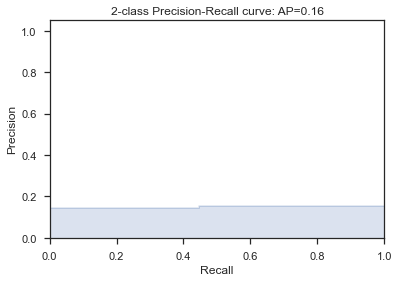

roc auc score: 0.5024475524475525



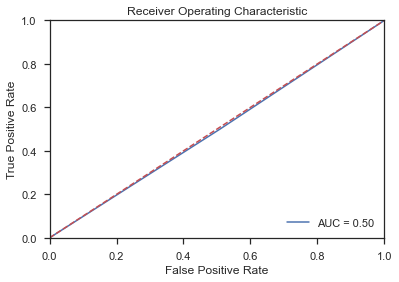

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.49      0.61       715
           1       0.14      0.45      0.21       130

    accuracy                           0.48       845
   macro avg       0.48      0.47      0.41       845
weighted avg       0.72      0.48      0.55       845


Confusion Matrix: 
 [[354 361]
 [ 53  77]]

End of validation Result



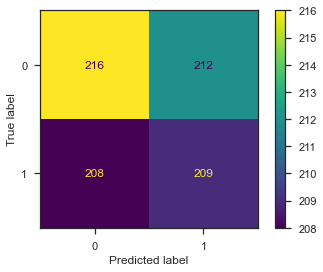

In [189]:
clf_score(clf_dummy, X_val, y_val, train=False)

### Logistic Regression

Validation Result:

accuracy score: 0.7669



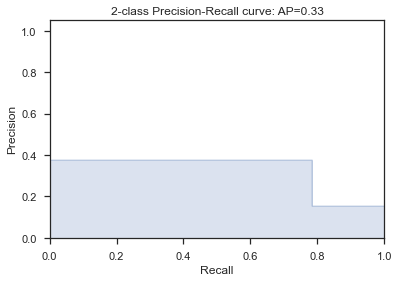

roc auc score: 0.7741258741258742



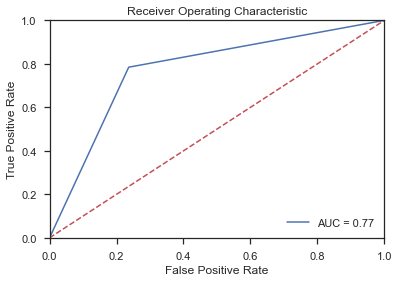

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.76      0.85       715
           1       0.38      0.78      0.51       130

    accuracy                           0.77       845
   macro avg       0.66      0.77      0.68       845
weighted avg       0.86      0.77      0.80       845


Confusion Matrix: 
 [[546 169]
 [ 28 102]]

End of validation Result



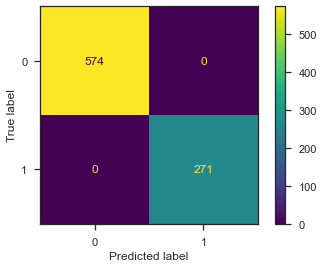

In [190]:
from sklearn.linear_model import LogisticRegression

clf_log_reg = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
clf_log_reg.fit(X_train_ros, y_train_ros)

clf_score(clf_log_reg, X_val, y_val, train=False)

In [281]:
clf_log_reg.get_params()

{'C': 0.0001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Random Forest

Validation Result:

accuracy score: 0.9633



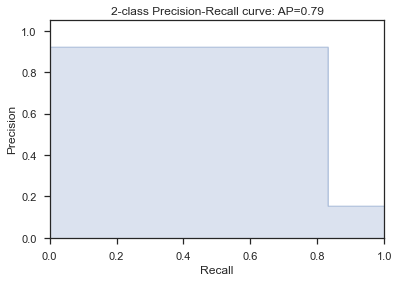

roc auc score: 0.9090909090909092



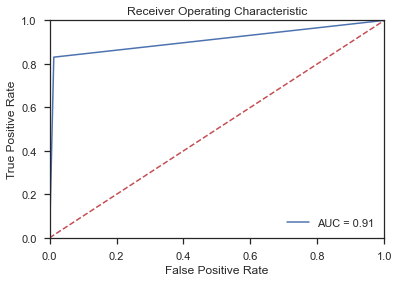

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       715
           1       0.92      0.83      0.87       130

    accuracy                           0.96       845
   macro avg       0.95      0.91      0.93       845
weighted avg       0.96      0.96      0.96       845


Confusion Matrix: 
 [[706   9]
 [ 22 108]]

End of validation Result



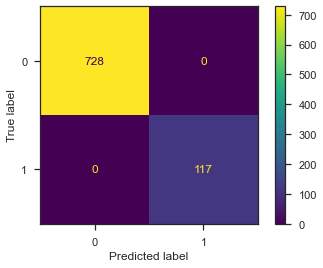

In [193]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=40, random_state=42)
clf_rf.fit(X_train_ros, y_train_ros)

clf_score(clf_rf, X_val, y_val,train=False)

In [283]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Validation Result:

accuracy score: 0.9290



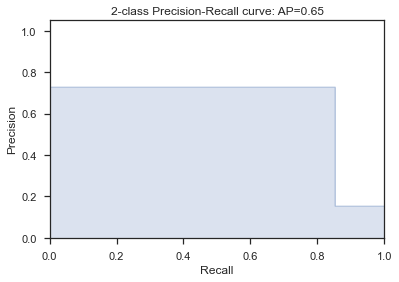

roc auc score: 0.8982517482517482



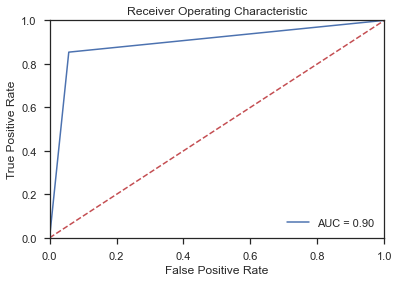

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       715
           1       0.73      0.85      0.79       130

    accuracy                           0.93       845
   macro avg       0.85      0.90      0.87       845
weighted avg       0.94      0.93      0.93       845


Confusion Matrix: 
 [[674  41]
 [ 19 111]]

End of validation Result



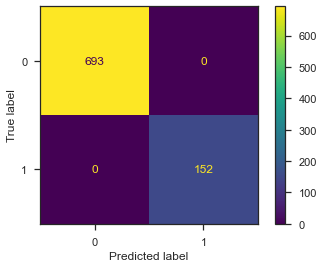

In [194]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn=KNeighborsClassifier(n_neighbors=4)
clf_knn.fit(X_train_ros, y_train_ros)

clf_score(clf_knn, X_val, y_val, train=False)

In [285]:
clf_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

### XGBoost

[01:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation Result:

accuracy score: 0.9041



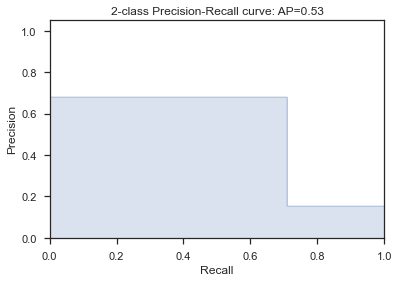

roc auc score: 0.8237762237762238



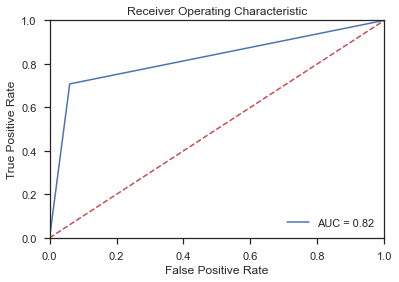

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       715
           1       0.68      0.71      0.69       130

    accuracy                           0.90       845
   macro avg       0.81      0.82      0.82       845
weighted avg       0.91      0.90      0.90       845


Confusion Matrix: 
 [[672  43]
 [ 38  92]]

End of validation Result



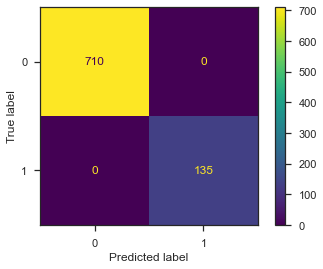

In [198]:
import xgboost as xgb

clf_xgb=xgb.XGBClassifier(random_state=1, learning_rate=0.01)
clf_xgb.fit(X_train_sm, y_train_sm)

clf_score(clf_xgb, X_val, y_val, train=False)

### AdaBoost

Validation Result:

accuracy score: 0.8462



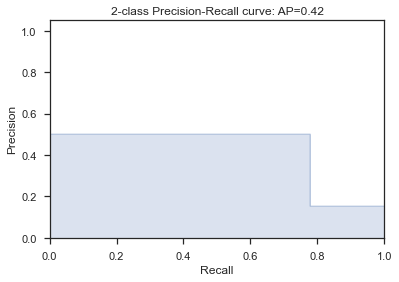

roc auc score: 0.8178321678321677



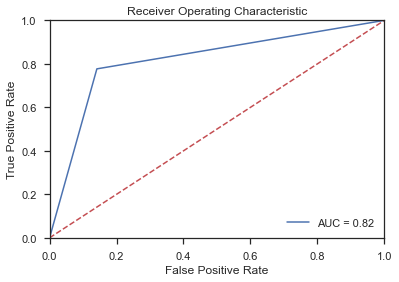

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       715
           1       0.50      0.78      0.61       130

    accuracy                           0.85       845
   macro avg       0.73      0.82      0.76       845
weighted avg       0.88      0.85      0.86       845


Confusion Matrix: 
 [[614 101]
 [ 29 101]]

End of validation Result



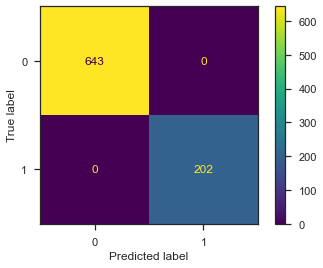

In [199]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada_boost = AdaBoostClassifier(n_estimators=40, random_state=42)
clf_ada_boost.fit(X_train_ros, y_train_ros)

clf_score(clf_ada_boost, X_val, y_val,  train=False)

### CatBoost

0:	learn: 0.5063063	total: 163ms	remaining: 163ms
1:	learn: 0.4640528	total: 166ms	remaining: 0us
class =  [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0

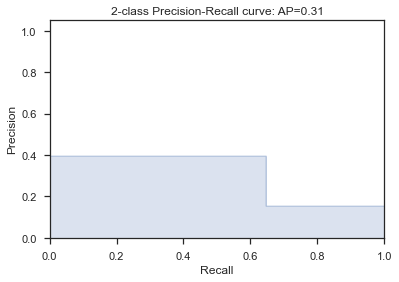

roc auc score: 0.7335664335664336



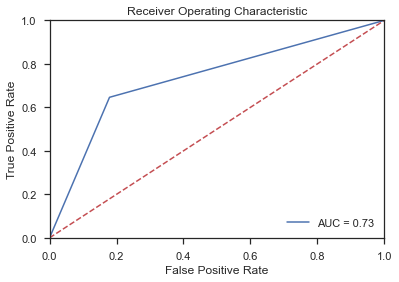

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       715
           1       0.40      0.65      0.49       130

    accuracy                           0.79       845
   macro avg       0.66      0.73      0.68       845
weighted avg       0.85      0.79      0.81       845


Confusion Matrix: 
 [[587 128]
 [ 46  84]]

End of validation Result



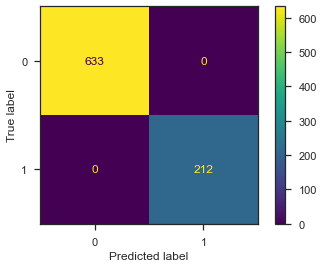

In [200]:
#!pip install catboost

from catboost import CatBoostClassifier, Pool

clf_cat_boost = CatBoostClassifier(iterations=2,
                                   depth=2,
                                   learning_rate=1,
                                   loss_function='Logloss',
                                   verbose=True)
# train the model
clf_cat_boost.fit(X_train_ros, y_train_ros)

# make the prediction using the resulting model
preds_class = clf_cat_boost.predict(X_val)
preds_proba = clf_cat_boost.predict_proba(X_val)
print("class = ", preds_class)
print("proba = ", preds_proba)

clf_score(clf_cat_boost, X_val, y_val,  train=False)

### Multiple Layer Perceptron

In [203]:
X_train_ros.shape

(6428, 30)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
6428/6428 [==============================] - 5s 768us/step - loss: 0.5105 - accuracy: 0.7319
Epoch 2/3
6428/6428 [==============================] - 5s 751us/step - loss: 0.3221 - accuracy: 0.8578
Epoch 3/3
27/27 [==============================] - 0s 733us/step - loss: 0.3447 - accuracy: 0.8651
[0.3447487950325012, 0.8650887608528137]


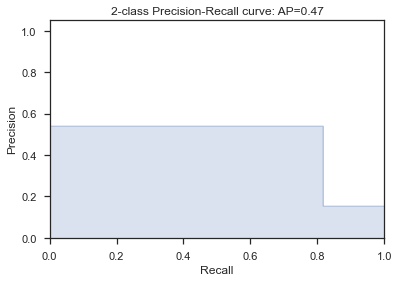

roc auc score: 0.8447552447552449



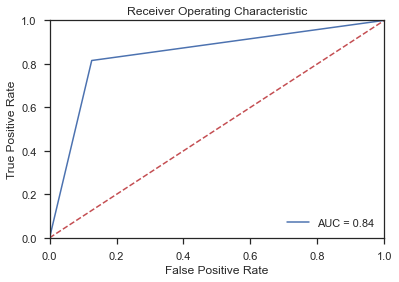

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       715
           1       0.54      0.82      0.65       130

    accuracy                           0.87       845
   macro avg       0.75      0.84      0.78       845
weighted avg       0.90      0.87      0.88       845


Confusion Matrix: 
 [[625  90]
 [ 24 106]]



In [204]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(12, activation='relu', input_shape=(30,)))
mlp.add(Dense(8, activation= 'relu'))
mlp.add(Dense(1, activation='sigmoid'))

mlp.output_shape
mlp.summary()
mlp.get_config()
mlp.get_weights()

mlp.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

train_y = np.asarray(y_train_sm)
mlp.fit(X_train_sm, train_y, epochs=3, batch_size=1, verbose=1)

y_pred = mlp.predict_classes(X_val)

val_y = np.asarray(y_val)
score = mlp.evaluate(X_val, val_y, verbose=1)
print(score)

evaluation_metrics(y_val, y_pred)

In [201]:
import autokeras as ak

# It tries 10 different models.
clf_auto_keras = ak.StructuredDataClassifier(max_trials=10)
# Feed the structured data classifier with training data.
clf_auto_keras.fit(X_train_ros, y_train_ros)
# Predict with the best model.
predicted_y = clf_auto_keras.predict(X_val)
# Evaluate the best model with testing data.
print(clf_auto_keras.evaluate(X_val, y_val))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
structured_data...|dense             |?                 
light_gbm_1/lig...|5                 |?                 
light_gbm_1/lig...|0.6               |?                 
light_gbm_1/lig...|10                |?                 
light_gbm_1/lig...|0.105             |?                 
light_gbm_1/lig...|50                |?                 
optimizer         |adam              |?                 

Epoch 1/1000


AttributeError: in user code:

    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:758 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:387 update_state
        self.build(y_pred, y_true)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:317 build
        self._metrics = nest.map_structure_up_to(y_pred, self._get_metric_objects,
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1159 map_structure_up_to
        return map_structure_with_tuple_paths_up_to(
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1257 map_structure_with_tuple_paths_up_to
        results = [
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1258 <listcomp>
        func(*args, **kwargs) for args in zip(flat_path_gen, *flat_value_gen)
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1161 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:418 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:418 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Users\e_wor\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:439 _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'tuple' object has no attribute 'shape'


**Stacked Ensemble**

In [211]:
#!pip install mlxtend
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import (
    StackingClassifier, 
)
clfs = [
    x() for x in [
        DecisionTreeClassifier,
        LogisticRegression,
        KNeighborsClassifier,
        GaussianNB,
        SVC,
        RandomForestClassifier,
    ]
]
stack = StackingClassifier(
    classifiers=clfs,
    meta_classifier=LogisticRegression(),
)
kfold = model_selection.KFold(n_splits=10, random_state=42)
s = model_selection.cross_val_score(stack, X_train, y_train, scoring="roc_auc", cv=kfold)
t = model_selection.cross_val_score(stack, X_train, y_train, scoring="accuracy", cv=kfold)
print(f"{stack.__class__.__name__}  "
      f"AUC: {s.mean():.3f}  STD: {s.std():.2f}")
print(f"{stack.__class__.__name__}  "
      f"ACC: {t.mean():.3f}  STD: {t.std():.2f}")

StackingClassifier  AUC: 0.958  STD: 0.02
StackingClassifier  ACC: 0.953  STD: 0.01


# 4 - MODEL SELECTION AND TUNING

### Compare Accuracy of Models

In [216]:
model_comparison = pd.DataFrame({'Model':['DummyClassifier','Logistic Regression','Random Forest','KNN','XGBoost','AdaBoost','CatBoost','ANN'],
                 'Accuracy': [0.496, 0.767, 0.963, 0.929, 0.904, 0.846, 0.794, 0.865],
                 'AUC ROC': [0.502, 0.774, 0.909, 0.898, 0.824, 0.818, 0.734, 0.844]})

model_comparison


,Model,Accuracy,AUC ROC
0,DummyClassifier,0.496,0.502
1,Logistic Regression,0.767,0.774
2,Random Forest,0.963,0.909
3,KNN,0.929,0.898
4,XGBoost,0.904,0.824
5,AdaBoost,0.846,0.818
6,CatBoost,0.794,0.734
7,ANN,0.865,0.844


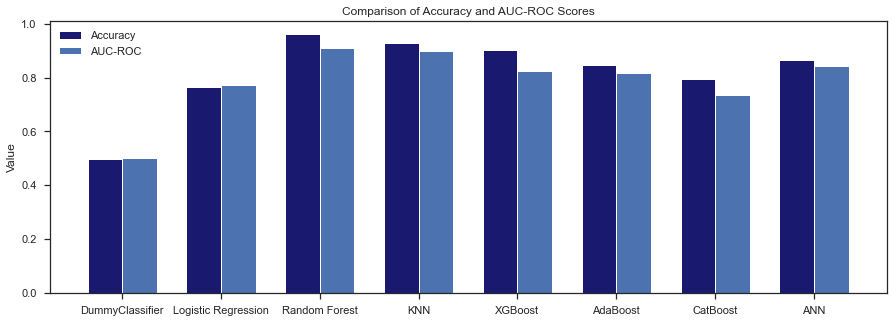

In [233]:
labels = model_comparison['Model']
acc = model_comparison['Accuracy']
auc = model_comparison['AUC ROC']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))
bar1 = ax.bar(x - width/2, acc, width, label='Accuracy', color='midnightblue')
bar1 = ax.bar(x + width/2, auc, width, label='AUC-ROC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Comparison of Accuracy and AUC-ROC Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


### Feature Importance

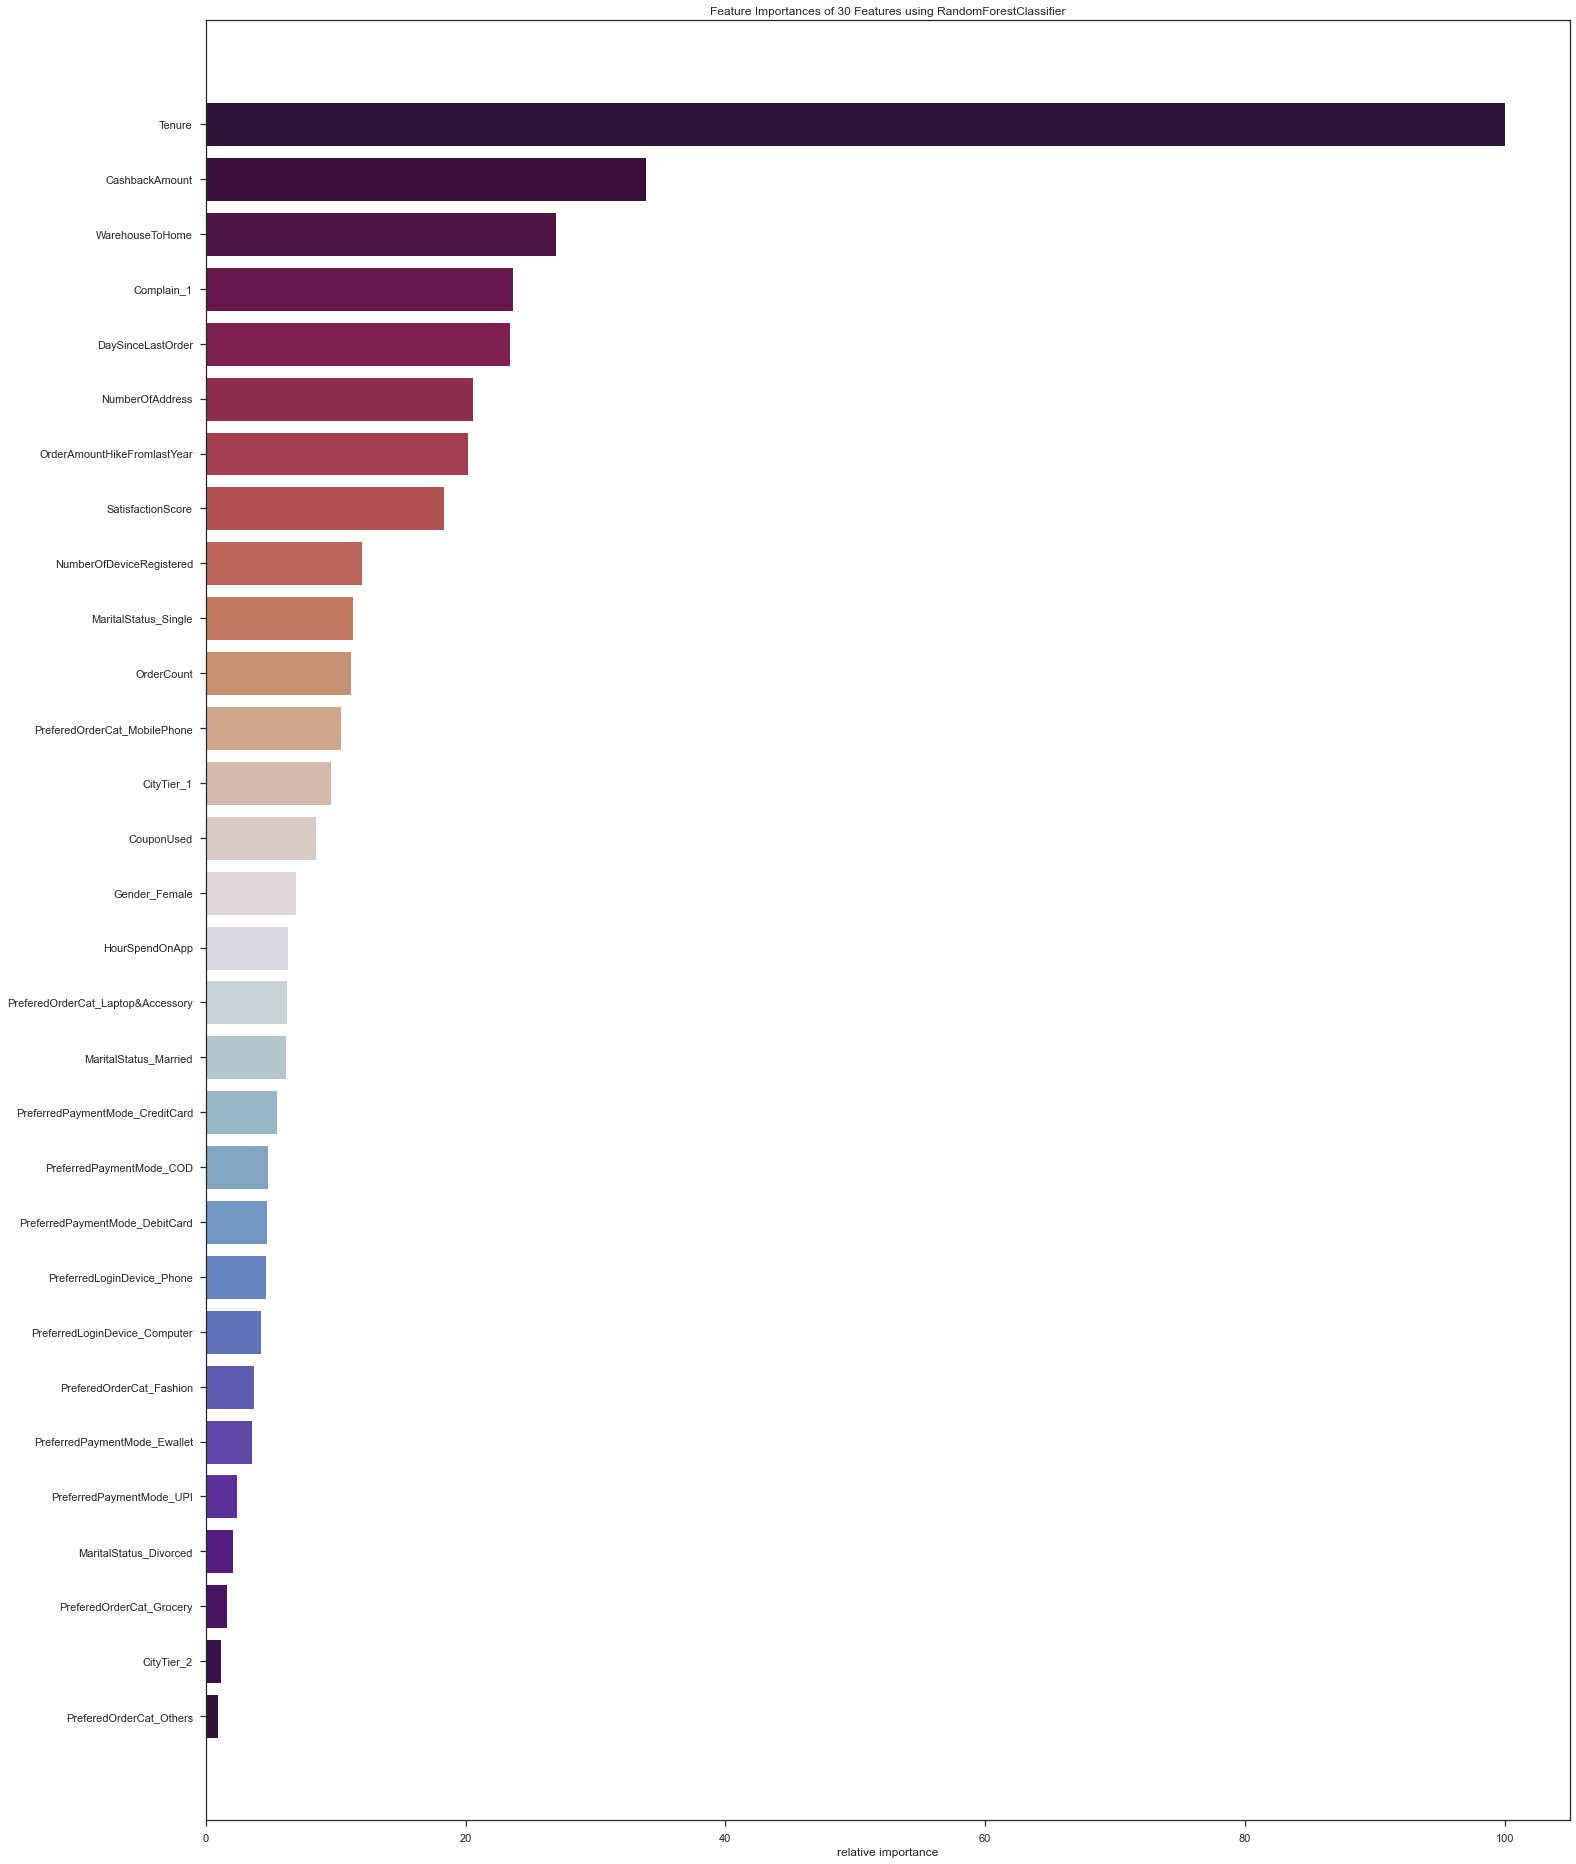

In [244]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(clf_rf, labels=X_train_ros.columns, colormap='twilight_shifted', rotation=180)
viz.fit(X_train_ros, y_train_ros)
viz.poof()

### RandomSearch CV

In [245]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
param = [{'bootstrap': [True],
 'ccp_alpha': [0.0],
 'class_weight': ['balanced', 'balanced_subsample'],
 'criterion': ['gini','entropy'],
 'max_depth': [None],
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1],
 'min_samples_split': [2,5],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [20,100],
 'n_jobs': [None],
 'oob_score': [False,bool],
 'random_state': [42],
 'verbose': [0],
 'warm_start': [False]}]
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, 
n_iter =10, cv=9)
rnd_search.fit(X_train_ros, y_train_ros)
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'warm_start': False, 'verbose': 0, 'random_state': 42, 'oob_score': <class 'bool'>, 'n_jobs': None, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_split': None, 'min_impurity_decrease': 0.0, 'max_samples': None, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced', 'ccp_alpha': 0.0, 'bootstrap': True}
0.9925318690024574


## 5 - Test Model with Test Set

### Create Pipeline

In [ ]:
num_attribs = test[['Tenure', 'WarehouseToHome', 'HourSpendOnApp','NumberOfDeviceRegistered', 'SatisfactionScore', 
                   'NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount','DaySinceLastOrder', 
                    'CashbackAmount']]
cat_attribs = test[['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender', 'PreferedOrderCat','MaritalStatus',
                    'Complain']]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])
test_num_tr = num_pipeline.fit_transform(num_attribs)

from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(sparse=False), cat_attribs),
    ])
test_prepared = full_pipeline.fit_transform(test)


**Use Best Hyperparameters for RF**

In [256]:
clf_rf_best = ensemble.RandomForestClassifier(
    **{
        "max_features": "auto",
        "min_samples_leaf": 2,
        "n_estimators": 100,
        "random_state": 42,
        "n_jobs":-1,
    })
clf_rf_best.fit(X_train_ros, y_train_ros)
clf_rf_best.score(X_test, y_test)

0.9514218009478673

Validation Result:

accuracy score: 0.9645



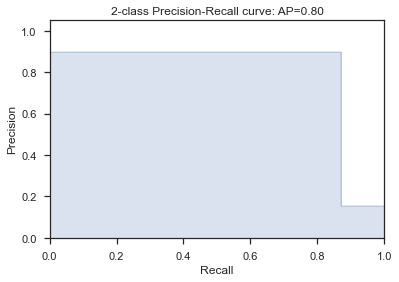

roc auc score: 0.9255244755244756



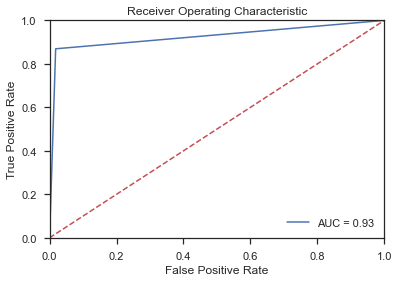

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       715
           1       0.90      0.87      0.88       130

    accuracy                           0.96       845
   macro avg       0.94      0.93      0.93       845
weighted avg       0.96      0.96      0.96       845


Confusion Matrix: 
 [[702  13]
 [ 17 113]]

End of validation Result



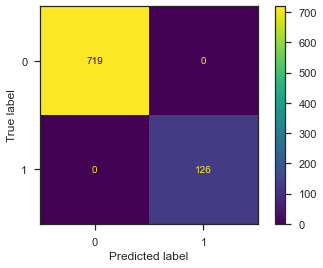

In [257]:
clf_score(clf_rf_best, X_test, y_test, train=False)

### Learning Curve

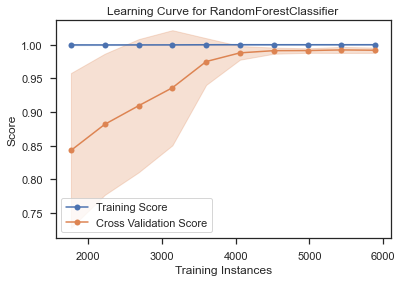

In [258]:
import numpy as np
fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    clf_rf,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax,
)
lc_viz.fit(X_train_ros, y_train_ros)
lc_viz.poof()

# EXTRA

Dummy Classifier: 0.490651 (0.009076)
Logistic Regression: 0.815991 (0.016311)
Random Forest Classifier: 0.991431 (0.002000)
KNeighborsClassifier: 0.901217 (0.011593)
[20:06:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

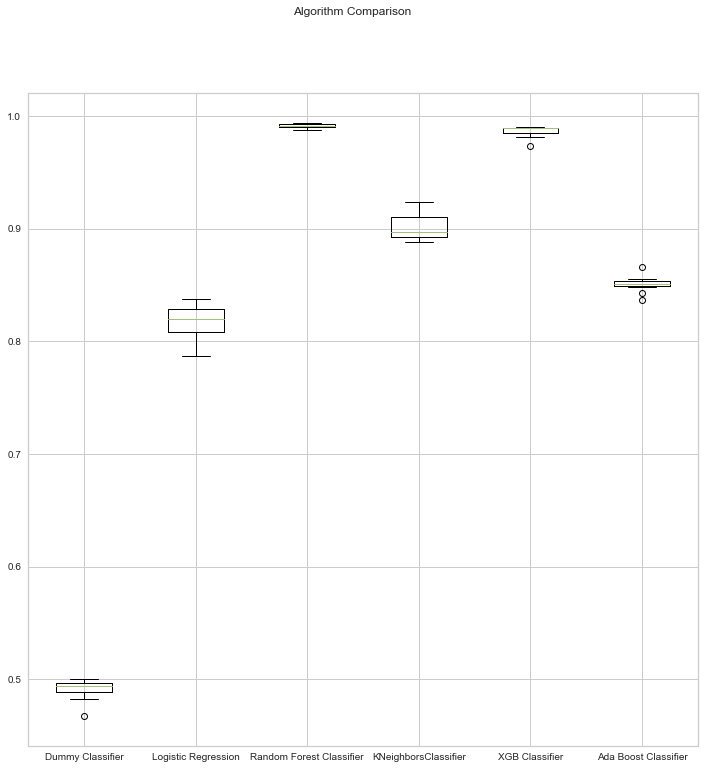

In [287]:
# train the model
# prepare models
models = []
models.append(('Dummy Classifier', DummyClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGB Classifier', xgb.XGBClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
#models.append(('Cat Boost Classifier', clf_cat_boost.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Multiple Classifiers', clf.fit()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_ros, y_train_ros, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize = [12,12])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Percision Score of Models

Dummy Classifier: 0.242286 (0.242384)
Logistic Regression: 0.816390 (0.023262)
Random Forest Classifier: 0.983718 (0.006211)
KNeighborsClassifier: 0.850018 (0.019059)
[20:07:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

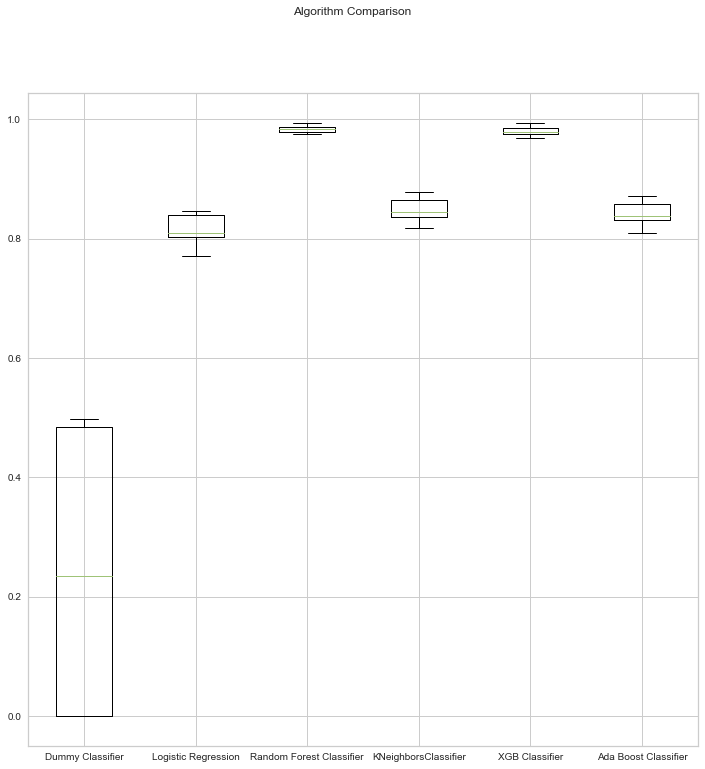

In [288]:
# train the model
# prepare models
models = []
models.append(('Dummy Classifier', DummyClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGB Classifier', xgb.XGBClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
#models.append(('Cat Boost Classifier', clf_cat_boost.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Multiple Classifiers', clf.fit()))

# evaluate each model in turn
results = []
names = []
scoring = 'precision'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_ros, y_train_ros, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize = [12,12])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Recall Score of Models

Dummy Classifier: 0.700000 (0.458258)
Logistic Regression: 0.823346 (0.025069)
Random Forest Classifier: 0.997560 (0.003302)
KNeighborsClassifier: 0.976367 (0.012180)
[20:07:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

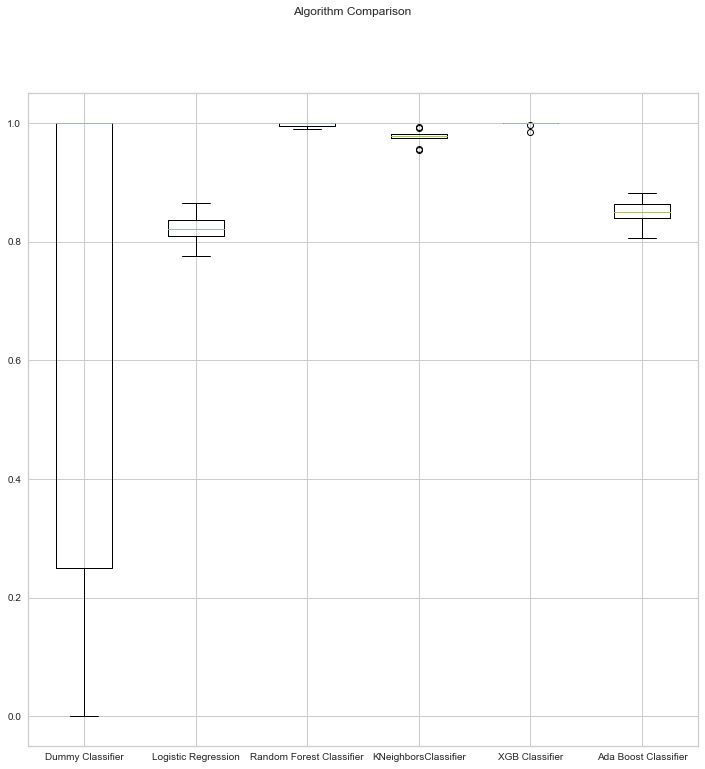

In [289]:
# train the model
# prepare models
models = []
models.append(('Dummy Classifier', DummyClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGB Classifier', xgb.XGBClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
#models.append(('Cat Boost Classifier', clf_cat_boost.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Multiple Classifiers', clf.fit()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_ros, y_train_ros, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize = [12,12])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## F1 Score of Models

Dummy Classifier: 0.391851 (0.320023)
Logistic Regression: 0.818188 (0.017005)
Random Forest Classifier: 0.993208 (0.003342)
KNeighborsClassifier: 0.910640 (0.010145)
[20:08:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

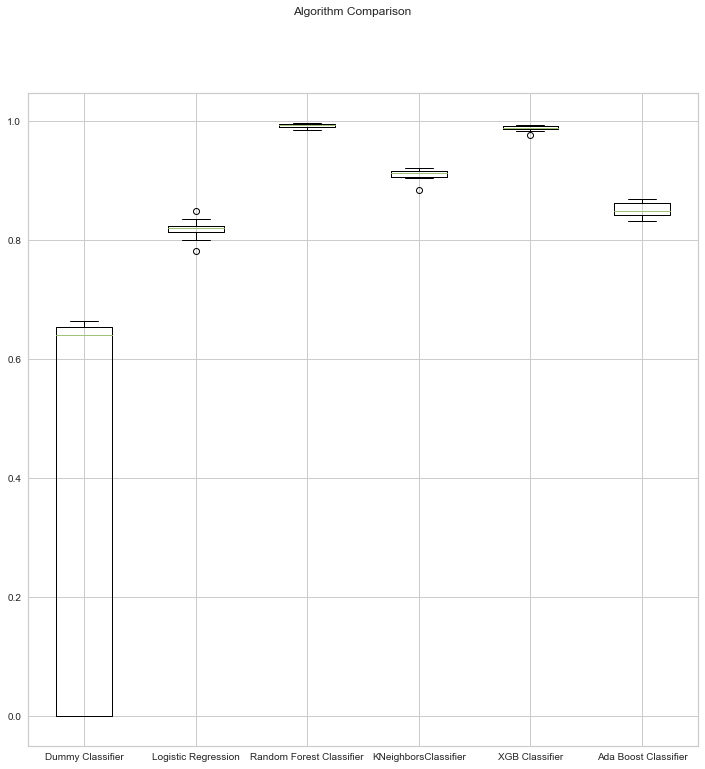

In [290]:
# train the model
# prepare models
models = []
models.append(('Dummy Classifier', DummyClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGB Classifier', xgb.XGBClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
#models.append(('Cat Boost Classifier', clf_cat_boost.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Multiple Classifiers', clf.fit()))

# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_ros, y_train_ros, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize = [12,12])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [291]:
#model_comparison = {'Model':['Logistic Regression','Random Forest','KNN','XGBoost','AdaBoost','CatBoost'],
                 #'Accuracy': [accuracy_score(y_test, clf_log_reg.predict(X_val)),
#                             accuracy_score(y_test, clf_rf.predict(X_val)),
 #                            accuracy_score(y_test, clf_knn.predict(X_val)),
  #                           accuracy_score(y_test, clf_xgb.predict(X_val)),
   #                          accuracy_score(y_test, clf_ada_boost.predict(X_val)),
    #                         accuracy_score(y_test, clf_cat_boost.predict(X_val))],}
                 #'AUC-ROC': [lasso_r2,ridge_r2,mars_r2,tree_r2,knn_r2,rf_r2,gbt_r2,ann_r2]}


#mse_comparison = pd.DataFrame(mse_comparison)
#mse_comparison

#plt.figure(figsize=(15,8))
#sns.barplot(x="Model", y="Score", data=mse_comparison, palette='Purples')

In [292]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

clf_log_reg_model = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
clf_rf_model = RandomForestClassifier(n_estimators=40, random_state=42)
clf_knn_model=KNeighborsClassifier(n_neighbors=4)
clf_xgb_model=xgb.XGBClassifier(random_state=1, learning_rate=0.01)
clf_ada_boost_model = AdaBoostClassifier(n_estimators=40, random_state=42)
#clf_cat_boost_model = CatBoostClassifier(iterations=2,
                                   #depth=2,
                                   #learning_rate=1,
                                   #loss_function='Logloss',
                                   #verbose=True)
#clf_auto_keras_model = ak.StructuredDataClassifier(max_trials=10)
#for model in [
#    DecisionTreeClassifier,
#    GaussianNB,
#    SVC,
#    KNeighborsClassifier,
#]:
#    clf = model()

In [314]:
models_scores_table = df.empty

def models_evaluation(X_train_ros, y_train_ros, folds):
    # Perform cross-validation to each machine learning classifier
    clf_log_reg = cross_validate(clf_log_reg_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
    clf_rf = cross_validate(clf_rf_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
    clf_knn = cross_validate(clf_knn_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
    clf_xgb = cross_validate(clf_xgb_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
    clf_ada_boost = cross_validate(clf_ada_boost_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
#    clf_cat_boost = cross_validate(clf_cat_boost_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
#    clf_auto_keras = cross_validate(clf_auto_keras_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
#    clf_model = cross_validate(clf, X_train_ros, y_train_ros, cv=folds, scoring=scoring)


    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[clf_log_reg['test_accuracy'].mean(),
                                                               clf_log_reg['test_precision'].mean(),
                                                               clf_log_reg['test_recall'].mean(),
                                                               clf_log_reg['test_f1_score'].mean()],
                                       
                                      'Random Forest Classifier':[clf_rf['test_accuracy'].mean(),
                                                                   clf_rf['test_precision'].mean(),
                                                                   clf_rf['test_recall'].mean(),
                                                                   clf_rf['test_f1_score'].mean()],
                                       
                                      'K Neighbors Classifier':[clf_knn['test_accuracy'].mean(),
                                                       clf_knn['test_precision'].mean(),
                                                       clf_knn['test_recall'].mean(),
                                                       clf_knn['test_f1_score'].mean()],
                                       
                                      'XGB Classifier':[clf_xgb['test_accuracy'].mean(),
                                                       clf_xgb['test_precision'].mean(),
                                                       clf_xgb['test_recall'].mean(),
                                                       clf_xgb['test_f1_score'].mean()],
                                       
                                      'Ada Boost Classifier':[clf_ada_boost['test_accuracy'].mean(),
                                                              clf_ada_boost['test_precision'].mean(),
                                                              clf_ada_boost['test_recall'].mean(),
                                                              clf_ada_boost['test_f1_score'].mean()]},
                                       
                                       #'Cat Boost Classifier':[clf_cat_boost['test_accuracy'].mean(),
                                        #                      clf_cat_boost['test_precision'].mean(),
                                         #                     clf_cat_boost['test_recall'].mean(),
                                          #                    clf_cat_boost['test_f1_score'].mean()]},
                                       
                                           #'Keras Classifier':[clf_auto_keras['test_accuracy'].mean(),
                                        #                      clf_auto_keras['test_precision'].mean(),
                                         #                     clf_auto_keras['test_recall'].mean(),
                                          #                    clf_auto_keras['test_f1_score'].mean()]},
                                      
                                         #'Multiple Classifiers':[clf_model['test_accuracy'].mean(),
                                        #                      clf_model['test_precision'].mean(),
                                         #                     clf_model['test_recall'].mean(),
                                          #                    clf_model['test_f1_score'].mean()]},
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
        # Return models performance metrics scores data frame
    return(models_scores_table)

In [308]:
# Run models_evaluation function
models_evaluation(X_train_ros, y_train_ros, 4)

[20:42:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

,Logistic Regression,Random Forest Classifier,K Neighbors Classifier,XGB Classifier,Ada Boost Classifier,Best Score
Accuracy,0.766439,0.986444,0.920225,0.894047,0.841540,Random Forest Classifier
Precision,0.754781,0.974218,0.887017,0.893558,0.838273,Random Forest Classifier
Recall,0.789337,0.999377,0.963231,0.894669,0.846368,Random Forest Classifier
F1 Score,0.771586,0.986625,0.923533,0.894105,0.842282,Random Forest Classifier


In [315]:
models_scores_table

False

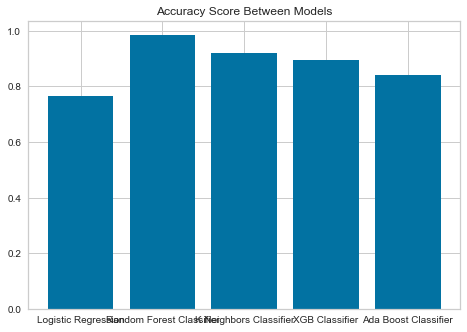

In [295]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['Logistic Regression','Random Forest Classifier','K Neighbors Classifier','XGB Classifier','Ada Boost Classifier']
scores = [0.766439, 0.986444, 0.920225, 0.894047,0.841540]
ax.bar(methods,scores)
ax.set_title('Accuracy Score Between Models')
plt.show()

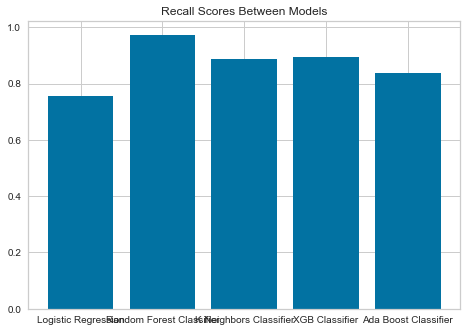

In [296]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['Logistic Regression','Random Forest Classifier','K Neighbors Classifier','XGB Classifier','Ada Boost Classifier']
scores = [0.754781, 0.974218, 0.887017, 0.893558,0.838273]
ax.bar(methods,scores)
ax.set_title('Recall Scores Between Models')
plt.show()

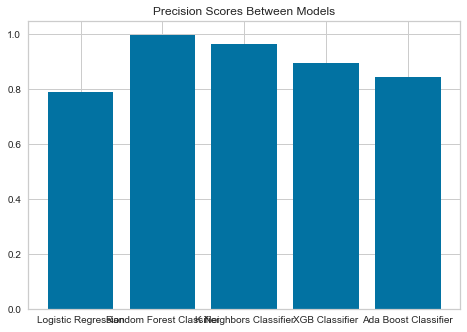

In [297]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['Logistic Regression','Random Forest Classifier','K Neighbors Classifier','XGB Classifier','Ada Boost Classifier']
scores = [0.789337,0.999377,0.963231,0.894669,0.846368]
ax.bar(methods,scores)
ax.set_title('Precision Scores Between Models')
plt.show()

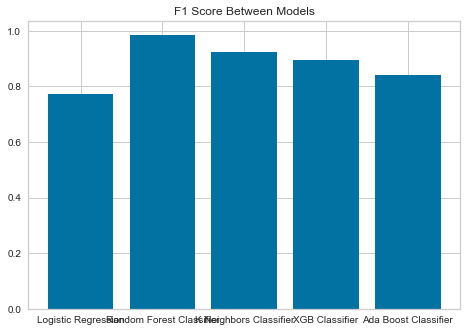

In [298]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['Logistic Regression','Random Forest Classifier','K Neighbors Classifier','XGB Classifier','Ada Boost Classifier']
scores = [0.771586,0.986625,0.923533,0.894105,0.842282]
ax.bar(methods,scores)
ax.set_title('F1 Score Between Models')
plt.show()

### Model Selection

The best performing model is...

In [137]:
#accuracy_score(y_test, clf_xgb.predict(X_test))

### Model Tuning

## Grid Search CV

In [299]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param = [{'bootstrap': [True],
 'ccp_alpha': [0.0],
 'class_weight': ['balanced', 'balanced_subsample'],
 'criterion': ['gini','entropy'],
 'max_depth': [None],
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1],
 'min_samples_split': [2,3,4],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [20,40,60,100],
 'n_jobs': [None],
 'oob_score': [False,bool],
 'random_state': [42],
 'verbose': [0],
 'warm_start': [False]}]

rnd_search = GridSearchCV(RandomForestClassifier(), param, cv=9)
rnd_search.fit(X_train_ros, y_train_ros)
print(rnd_search.best_params_)
print(rnd_search.best_score_)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
0.9918973978870027


## Randomized Search CV

In [300]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
param = [{'bootstrap': [True],
 'ccp_alpha': [0.0],
 'class_weight': ['balanced', 'balanced_subsample'],
 'criterion': ['gini','entropy'],
 'max_depth': [None],
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1],
 'min_samples_split': [2,5],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [20,100],
 'n_jobs': [None],
 'oob_score': [False,bool],
 'random_state': [42],
 'verbose': [0],
 'warm_start': [False]}]
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, 
n_iter =10, cv=9)
rnd_search.fit(X_train_ros, y_train_ros)
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'warm_start': False, 'verbose': 0, 'random_state': 42, 'oob_score': False, 'n_jobs': None, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_split': None, 'min_impurity_decrease': 0.0, 'max_samples': None, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced', 'ccp_alpha': 0.0, 'bootstrap': True}
0.9911186541002562


### Feature Importance

In [ ]:
#train_names = train.drop(columns=['Churn'])
#feat_importances = pd.Series(clf_rf.feature_importances_, index=train_names.columns)
#feat_importances.plot(kind='barh', color='b', align='center', figsize=(20,10))

In [351]:
#Test Pre-processing

test = pd.get_dummies(test, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])
def clean_col(name):
    return (
        name.strip().replace(" ", "")
    )

test = test.rename(columns=clean_col)
test['DaySinceLastOrder'] = test['DaySinceLastOrder'].fillna(test['DaySinceLastOrder'].median())
test['OrderAmountHikeFromlastYear'] = test['OrderAmountHikeFromlastYear'].fillna(test['OrderAmountHikeFromlastYear'].median())
test['Tenure'] = test['Tenure'].fillna(test['Tenure'].median())
test['OrderCount'] = test['OrderCount'].fillna(test['OrderCount'].median())
test['CouponUsed'] = test['CouponUsed'].fillna(test['CouponUsed'].median())
test['HourSpendOnApp'] = test['HourSpendOnApp'].fillna(test['HourSpendOnApp'].median())
test['WarehouseToHome'] = test['WarehouseToHome'].fillna(test['WarehouseToHome'].median())




In [420]:
rnd_search.fit(X_train_ros, y_train_ros)

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

Test Result:

accuracy score: 0.9633



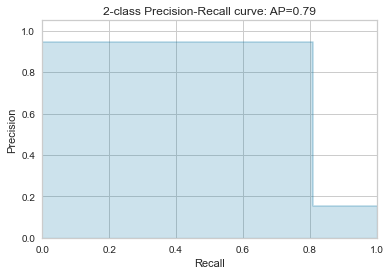

roc auc score: 0.8996503496503497



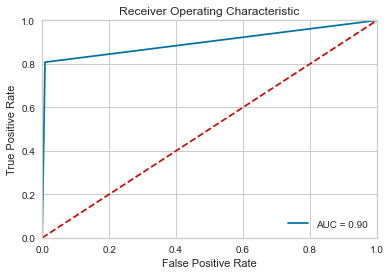

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       715
           1       0.95      0.81      0.87       130

    accuracy                           0.96       845
   macro avg       0.96      0.90      0.92       845
weighted avg       0.96      0.96      0.96       845


Confusion Matrix: 
 [[709   6]
 [ 25 105]]

End of validation Result



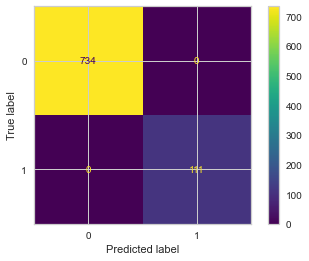

In [418]:
clf_score_2(rnd_search, X_test_ros, y_test_ros, train=False)

In [424]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
clf_rf = RandomForestClassifier(n_estimators=40, random_state=42)
clf_rf.fit(X_test_ros, y_test_ros)
importances = clf_rf.feature_importances_
importances

array([0.04794995, 0.25837347, 0.05417137, 0.01446873, 0.03445345,
       0.03908955, 0.04498488, 0.04466243, 0.02393137, 0.03940767,
       0.05280323, 0.08263617, 0.01009555, 0.00970741, 0.00669023,
       0.01459216, 0.00288341, 0.00514718, 0.00818904, 0.00286744,
       0.01323759, 0.01159926, 0.00711659, 0.00496875, 0.014854  ,
       0.00570208, 0.00738141, 0.02197457, 0.01122574, 0.01005485,
       0.00529756, 0.00651108, 0.01278344, 0.02095153, 0.04923685])

In [429]:
len(X_train_ros.columns)

34

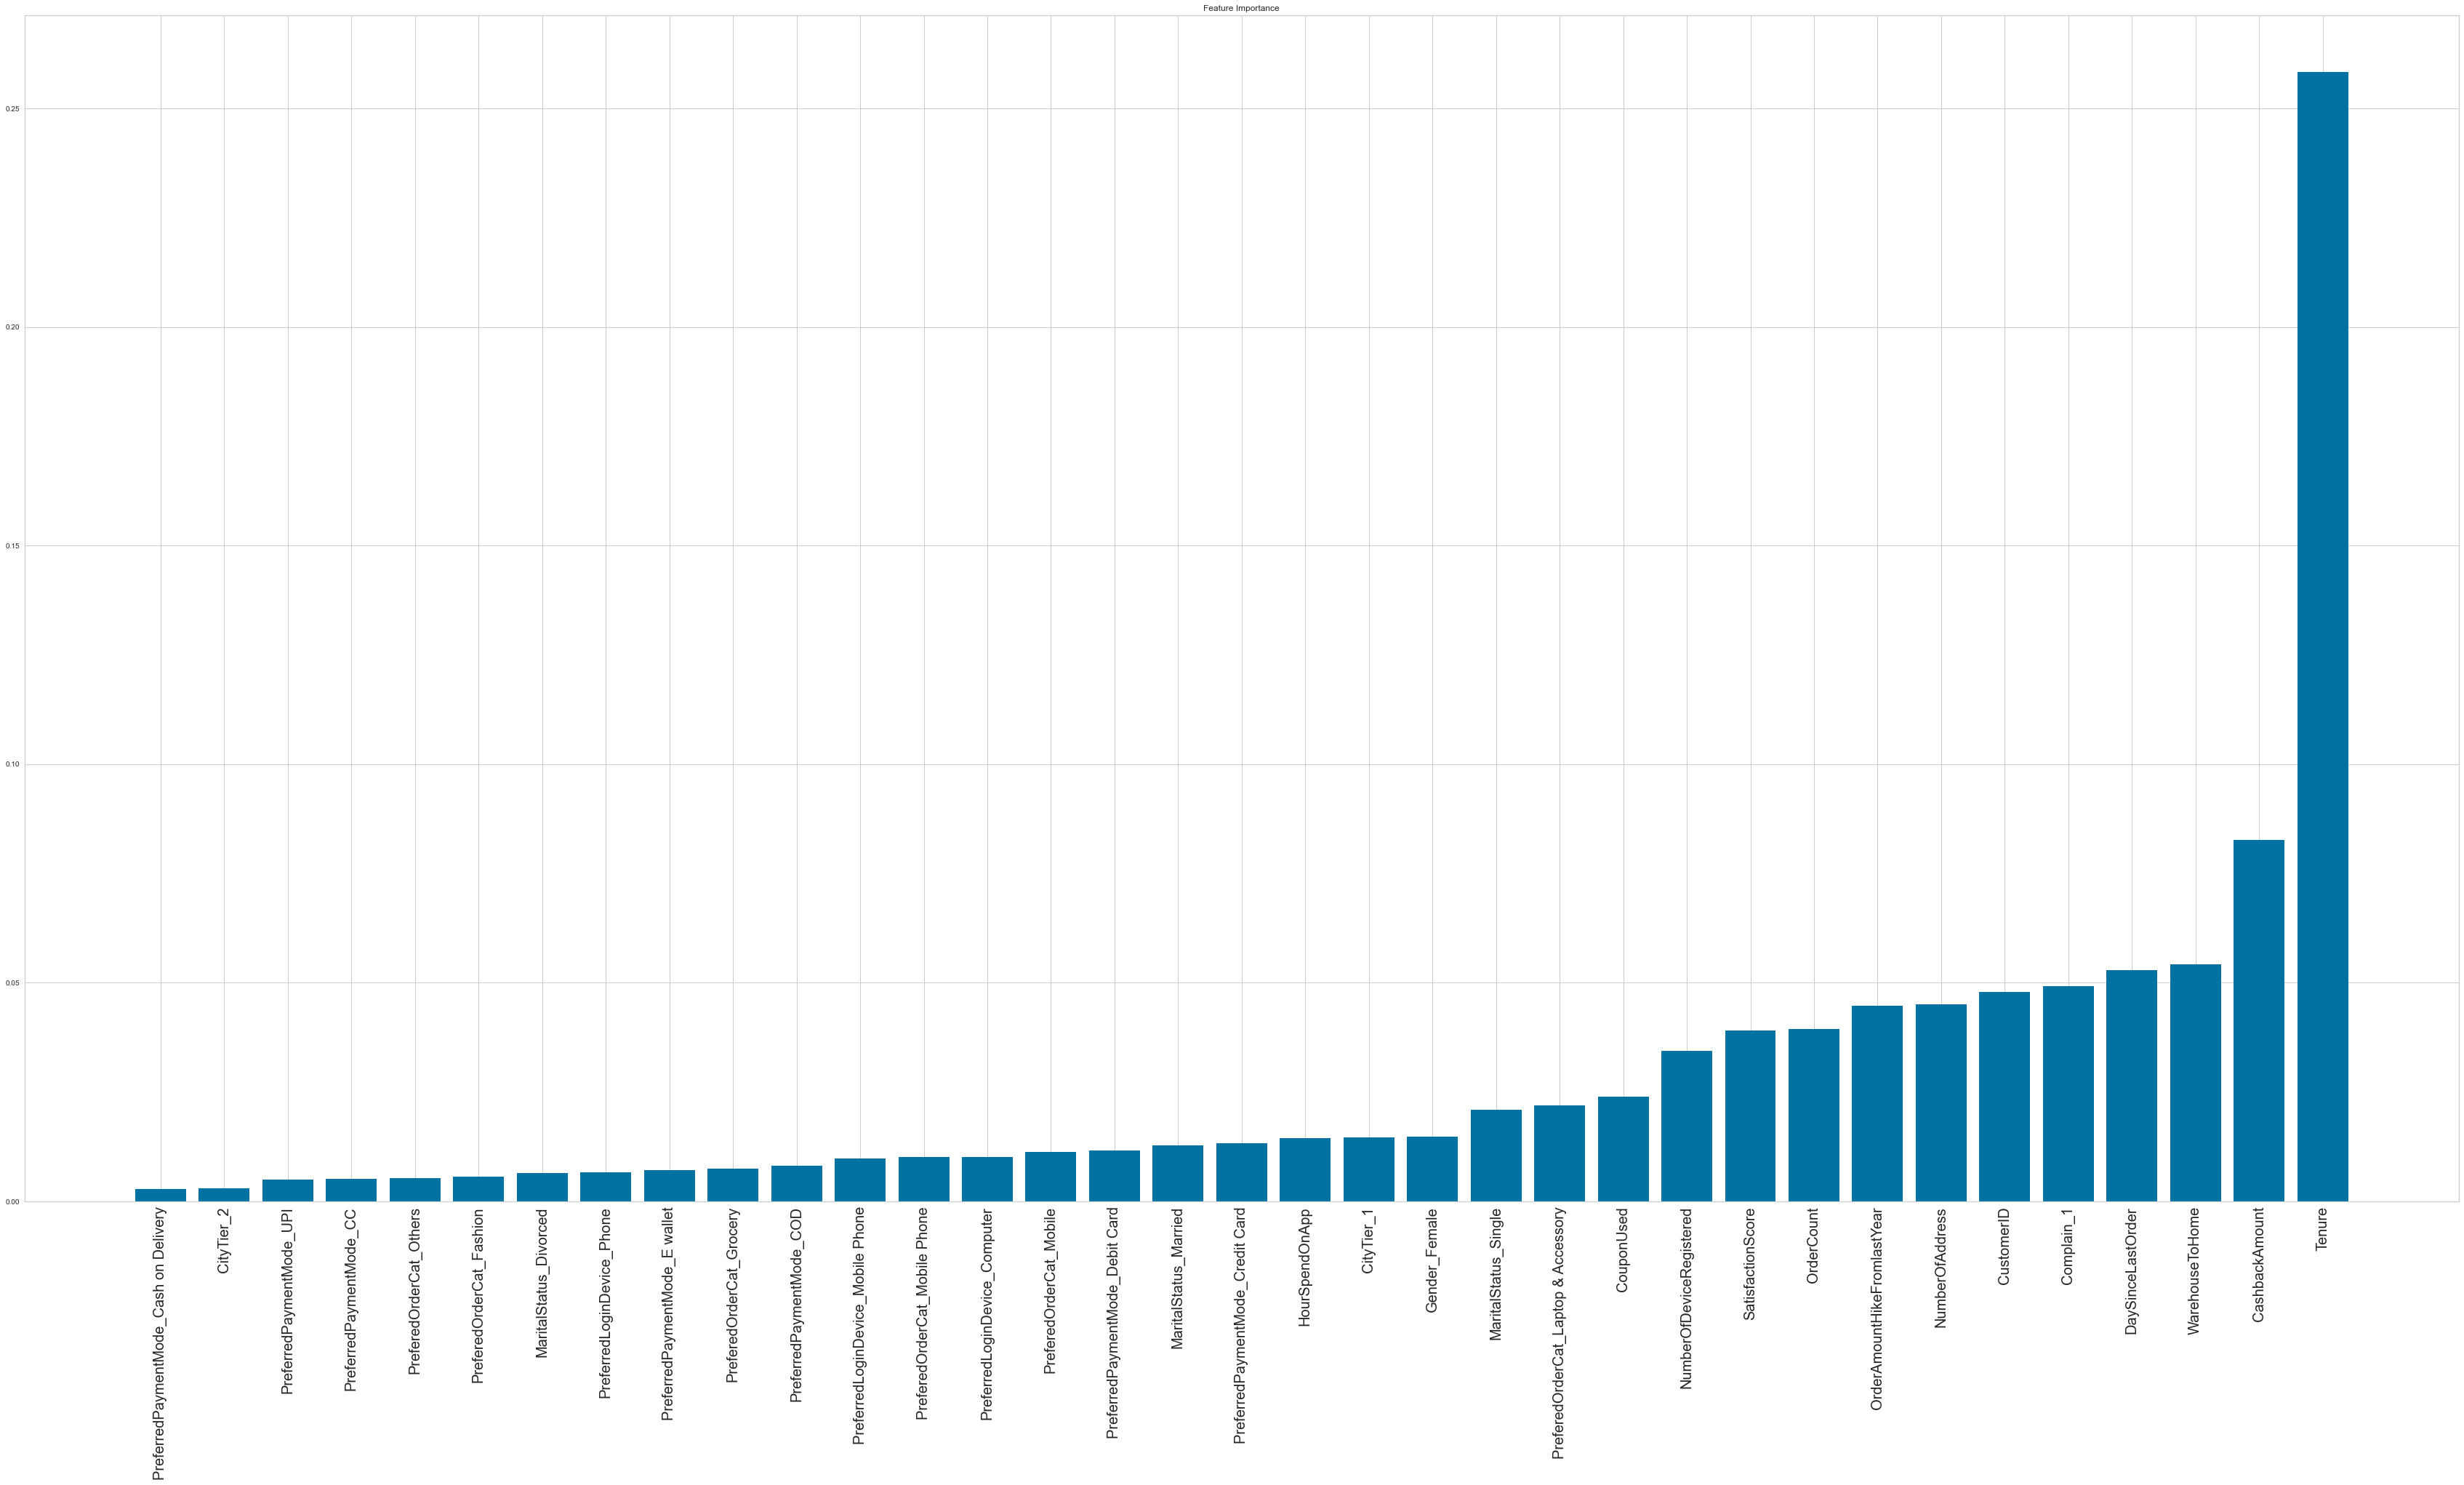

In [469]:
names = [X_test_ros.columns[i] for i in indices]

plt.figure(figsize=(60, 30))
plt.bar(range(X_test_ros.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_test_ros.shape[1]), names,rotation=90, fontsize = 20)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [ ]:
test